In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sklearn
import matplotlib
from matplotlib import pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")


In [2]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)

Numpy Version 1.21.5
Pandas Version 1.4.2
Seaborn Version 0.11.2
Matplotlib Version 3.5.1


In [3]:
df= pd.read_csv('Health Care Project.csv')
df.head()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866,28,1,...,Unknown,NaN,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,...,formerly smoked,NaN,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,...,formerly smoked,NaN,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,...,Unknown,NaN,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,...,never smoked,2004.0,Bangalore,74,N,No,Extreme,0,34,29616


In [4]:
pd.options.display.max_columns = None

In [5]:
df.head().T

,0,1,2,3,4
applicant_id,5000,5001,5002,5003,5004
years_of_insurance_with_us,3,0,1,7,3
regular_checkup_lasy_year,1,0,0,4,1
adventure_sports,1,0,0,0,0
Occupation,Salried,Student,Business,Business,Student
visited_doctor_last_1_year,2,4,4,2,2
cholesterol_level,125 to 150,150 to 175,200 to 225,175 to 200,150 to 175
daily_avg_steps,4866,6411,4509,6214,4938
age,28,50,68,51,44
heart_decs_history,1,0,0,0,0


In [6]:
df.tail()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,Gender,avg_glucose_level,bmi,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
24995,29995,3,0,0,Salried,4,225 to 250,5614,22,0,0,Male,145,36.1,smokes,2000.0,Kanpur,79,Y,Rare,Moderate,4,40,39488
24996,29996,6,0,0,Business,4,200 to 225,4719,58,0,0,Male,134,31.3,never smoked,2009.0,Kanpur,66,N,Rare,Moderate,2,28,14808
24997,29997,7,0,1,Student,2,150 to 175,5624,34,0,1,Male,151,NaN,Unknown,NaN,Bhubaneswar,76,N,Rare,Moderate,1,35,33318
24998,29998,1,0,0,Salried,2,225 to 250,10777,27,0,0,Male,66,26.6,Unknown,NaN,Surat,74,N,Rare,Moderate,0,40,30850
24999,29999,8,2,0,Business,4,150 to 175,5882,22,1,0,Male,245,41.6,formerly smoked,2014.0,Chennai,57,N,No,No,4,21,6170


In [7]:
df.shape

(25000, 24)

In [8]:
#Understanding of the attributes
#1.Varaible info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [10]:
# Checking the duplicated rows
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 0


In [11]:
#variables name
df.columns

Index(['applicant_id', 'years_of_insurance_with_us',
       'regular_checkup_lasy_year', 'adventure_sports', 'Occupation',
       'visited_doctor_last_1_year', 'cholesterol_level', 'daily_avg_steps',
       'age', 'heart_decs_history', 'other_major_decs_history', 'Gender',
       'avg_glucose_level', 'bmi', 'smoking_status', 'Year_last_admitted',
       'Location', 'weight', 'covered_by_any_other_company', 'Alcohol',
       'exercise', 'weight_change_in_last_one_year', 'fat_percentage',
       'insurance_cost'],
      dtype='object')

In [12]:
# Printing the data statistics by formatting it to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format   
df.describe().T


,count,mean,std,min,25%,50%,75%,max
applicant_id,25000.00,17499.50,7217.02,5000.00,11249.75,17499.50,23749.25,29999.00
years_of_insurance_with_us,25000.00,4.09,2.61,0.00,2.00,4.00,6.00,8.00
regular_checkup_lasy_year,25000.00,0.77,1.20,0.00,0.00,0.00,1.00,5.00
adventure_sports,25000.00,0.08,0.27,0.00,0.00,0.00,0.00,1.00
visited_doctor_last_1_year,25000.00,3.10,1.14,0.00,2.00,3.00,4.00,12.00
daily_avg_steps,25000.00,5215.89,1053.18,2034.00,4543.00,5089.00,5730.00,11255.00
age,25000.00,44.92,16.11,16.00,31.00,45.00,59.00,74.00
heart_decs_history,25000.00,0.05,0.23,0.00,0.00,0.00,0.00,1.00
other_major_decs_history,25000.00,0.10,0.30,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,25000.00,167.53,62.73,57.00,113.00,168.00,222.00,277.00


In [13]:
#renaming of the varaibles

In [14]:
df['Occupation']=np.where(df['Occupation'] =='Salried', 'Salaried', df['Occupation'])
df['Occupation'].unique()

array(['Salaried', 'Student', 'Business'], dtype=object)

In [15]:
df.rename(columns = {'regular_checkup_lasy_year':'regular_checkup_last_year'}, inplace = True)

In [16]:
df.head().T

,0,1,2,3,4
applicant_id,5000,5001,5002,5003,5004
years_of_insurance_with_us,3,0,1,7,3
regular_checkup_last_year,1,0,0,4,1
adventure_sports,1,0,0,0,0
Occupation,Salaried,Student,Business,Business,Student
visited_doctor_last_1_year,2,4,4,2,2
cholesterol_level,125 to 150,150 to 175,200 to 225,175 to 200,150 to 175
daily_avg_steps,4866,6411,4509,6214,4938
age,28,50,68,51,44
heart_decs_history,1,0,0,0,0


In [17]:
#EDA for continuous variable
#Hsitogram and boxplot
#1.years_of_insurance_with_us

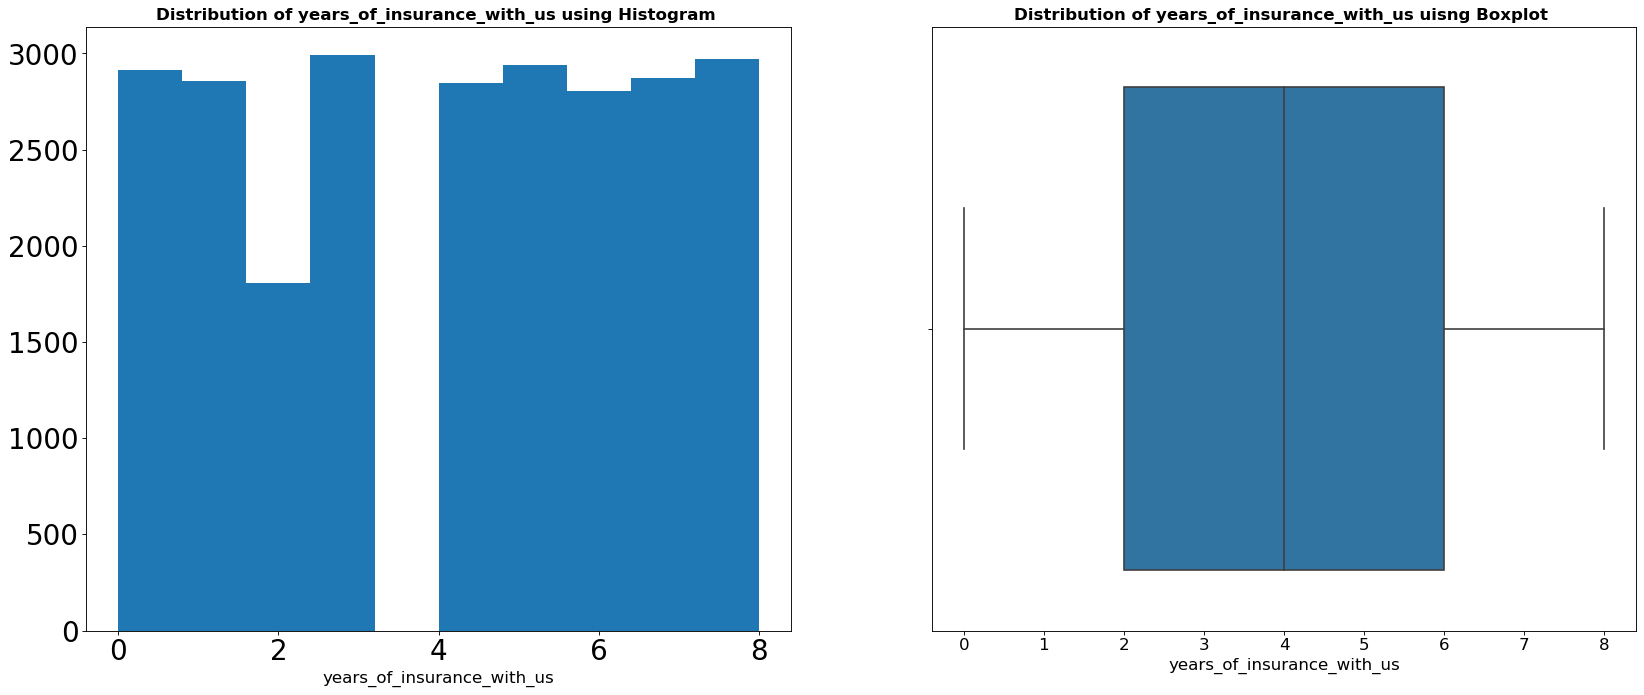

<Figure size 432x288 with 0 Axes>

In [18]:
#histogram
plt.figure(figsize=(25,10),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['years_of_insurance_with_us'])
plt.xlabel('years_of_insurance_with_us', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=25)
plt.title('Distribution of years_of_insurance_with_us using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='years_of_insurance_with_us',data=df)
plt.xlabel('years_of_insurance_with_us', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('Distribution of years_of_insurance_with_us uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()


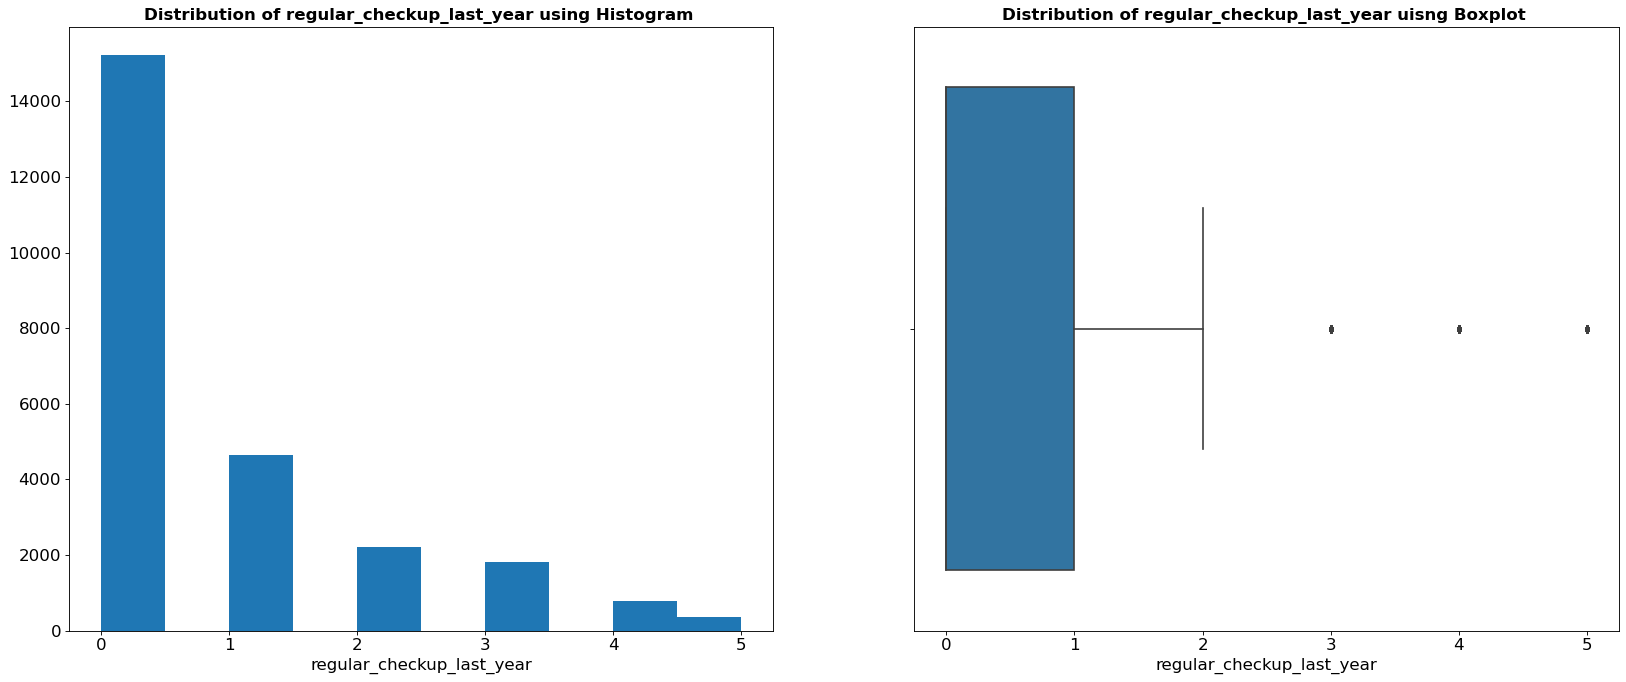

<Figure size 432x288 with 0 Axes>

In [19]:
#2.regular_checkup_last_year
#histogram
plt.figure(figsize=(25,10),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['regular_checkup_last_year'])
plt.xlabel('regular_checkup_last_year', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=15)
plt.title('Distribution of regular_checkup_last_year using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='regular_checkup_last_year',data=df)
plt.xlabel('regular_checkup_last_year', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('Distribution of regular_checkup_last_year uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

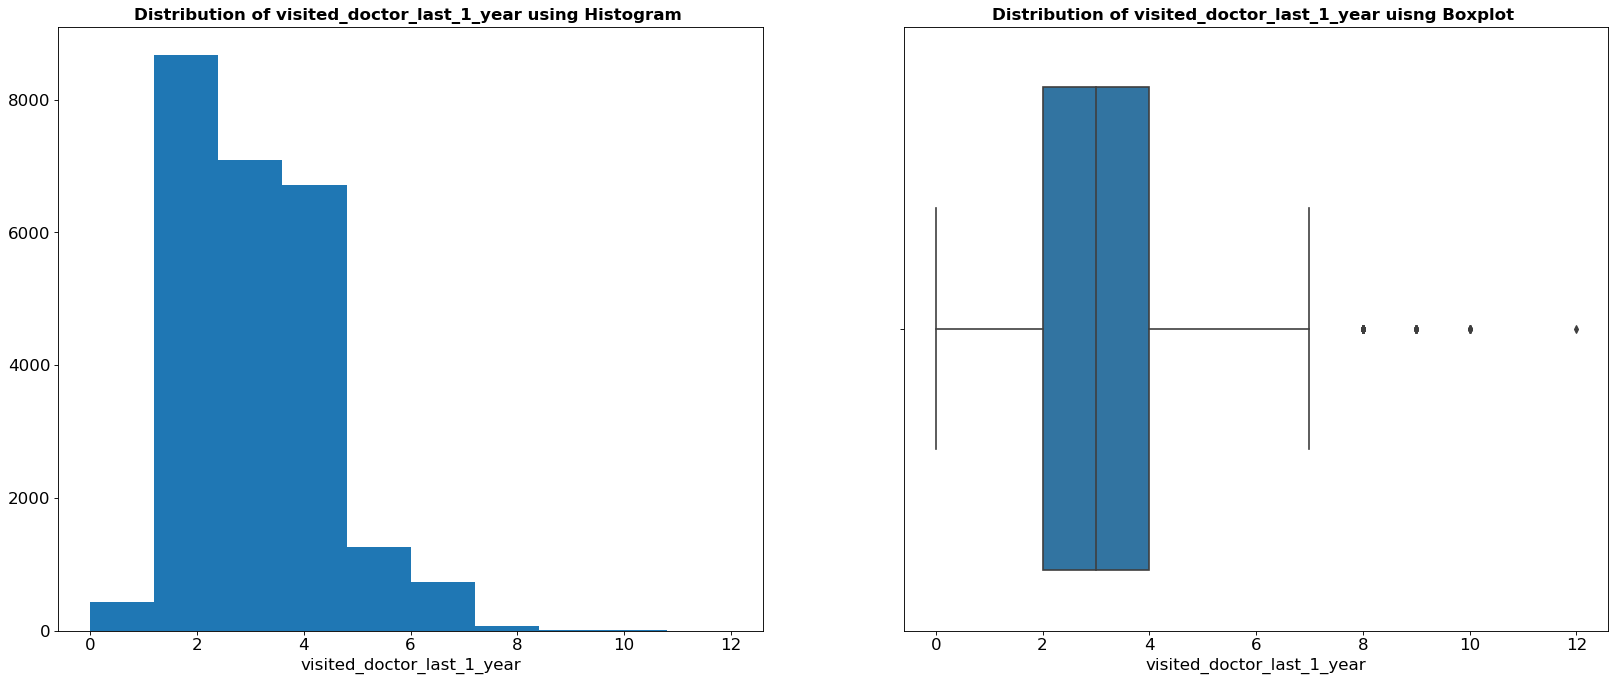

<Figure size 432x288 with 0 Axes>

In [20]:
#3.visited_doctor_last_1_year
#histogram
plt.figure(figsize=(25,10),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['visited_doctor_last_1_year'])
plt.xlabel('visited_doctor_last_1_year', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=15)
plt.title('Distribution of visited_doctor_last_1_year using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='visited_doctor_last_1_year',data=df)
plt.xlabel('visited_doctor_last_1_year', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('Distribution of visited_doctor_last_1_year uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()


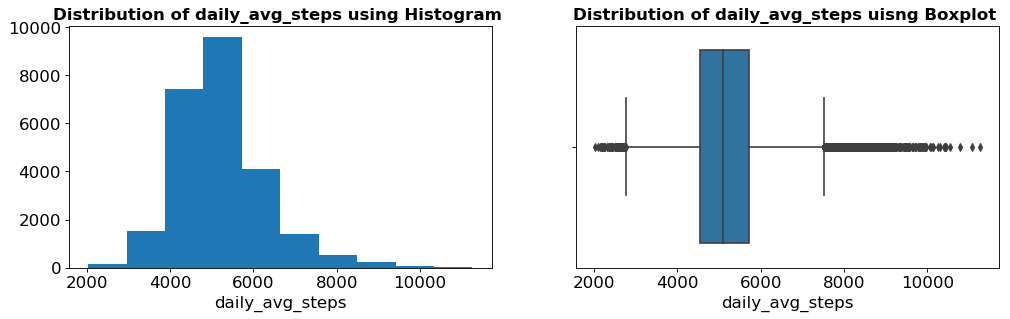

<Figure size 432x288 with 0 Axes>

In [21]:
#4.daily_avg_steps
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['daily_avg_steps'])
plt.xlabel('daily_avg_steps', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=15)
plt.title('Distribution of daily_avg_steps using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='daily_avg_steps',data=df)
plt.xlabel('daily_avg_steps', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('Distribution of daily_avg_steps uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

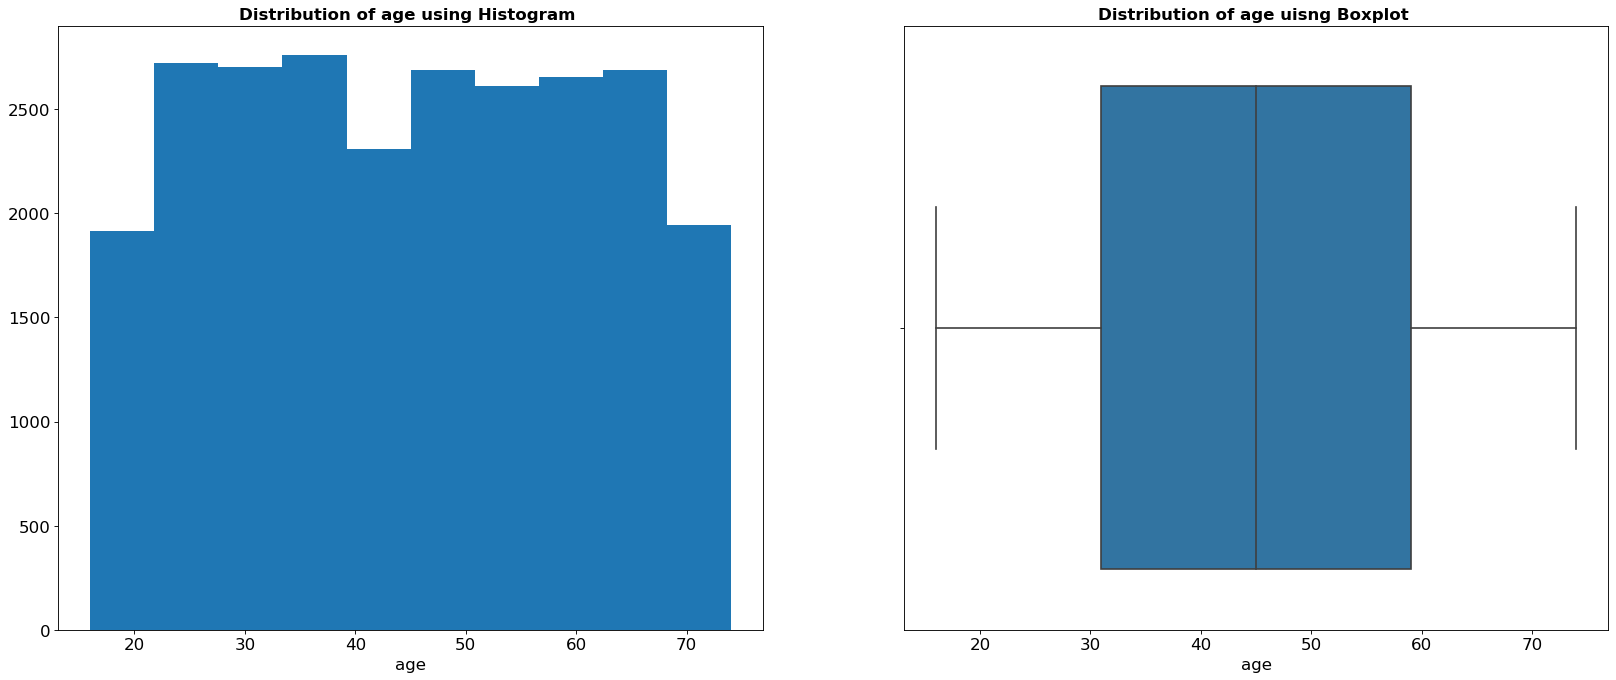

<Figure size 432x288 with 0 Axes>

In [22]:
#5.age
#histogram
plt.figure(figsize=(25,10),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['age'])
plt.xlabel('age', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=15)
plt.title('Distribution of age using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='age',data=df)
plt.xlabel('age', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('Distribution of age uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

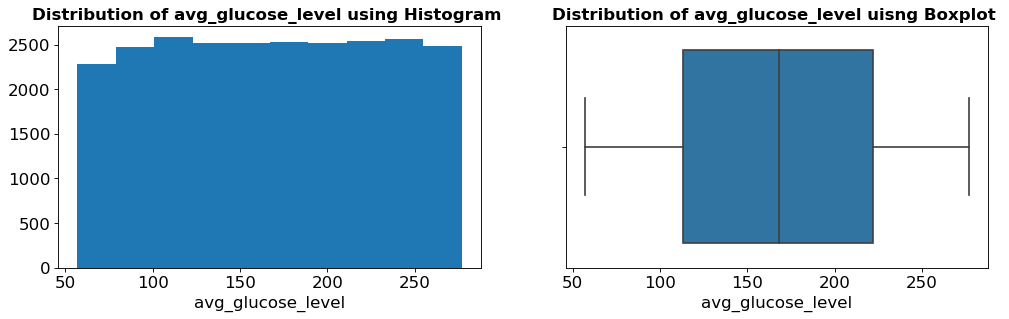

<Figure size 432x288 with 0 Axes>

In [23]:
#6.avg_glucose_level
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['avg_glucose_level'])
plt.xlabel('avg_glucose_level', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=15)
plt.title('Distribution of avg_glucose_level using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='avg_glucose_level',data=df)
plt.xlabel('avg_glucose_level', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('Distribution of avg_glucose_level uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()


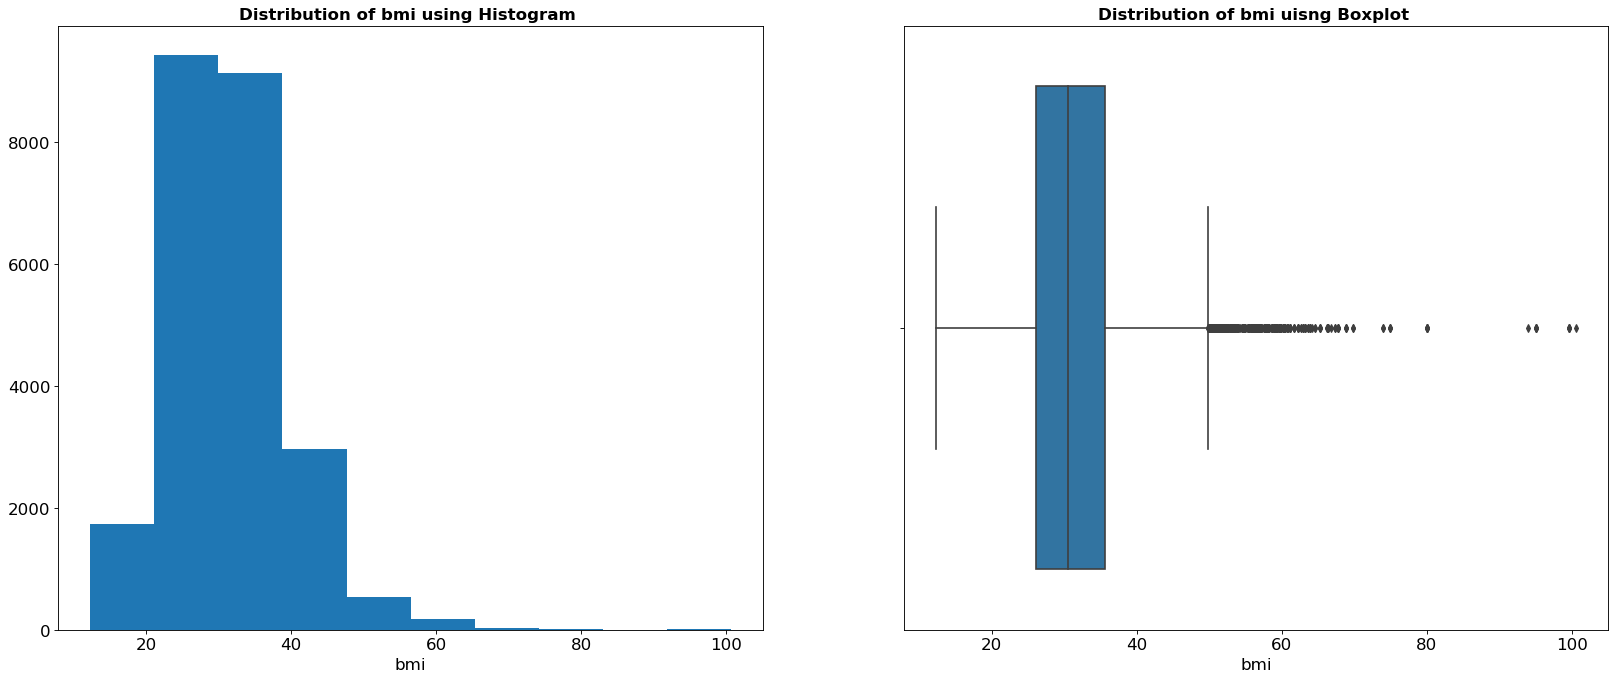

<Figure size 432x288 with 0 Axes>

In [24]:
#7.bmi
#histogram
plt.figure(figsize=(25,10),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['bmi'])
plt.xlabel('bmi', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=15)
plt.title('Distribution of bmi using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='bmi',data=df)
plt.xlabel('bmi', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('Distribution of bmi uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()


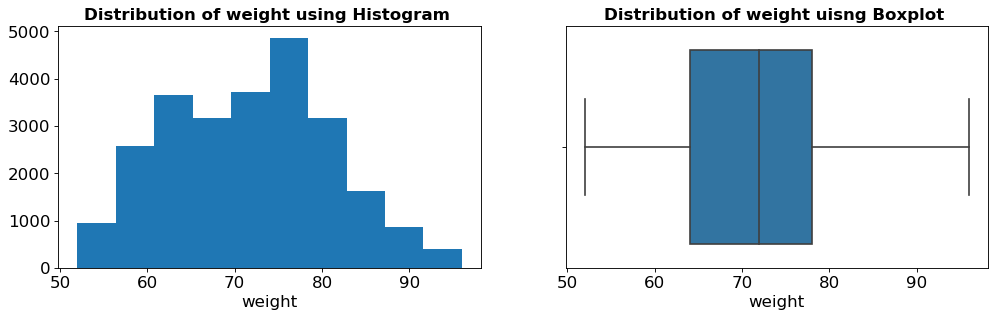

<Figure size 432x288 with 0 Axes>

In [25]:
#8.weight
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['weight'])
plt.xlabel('weight', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=15)
plt.title('Distribution of weight using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='weight',data=df)
plt.xlabel('weight', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('Distribution of weight uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

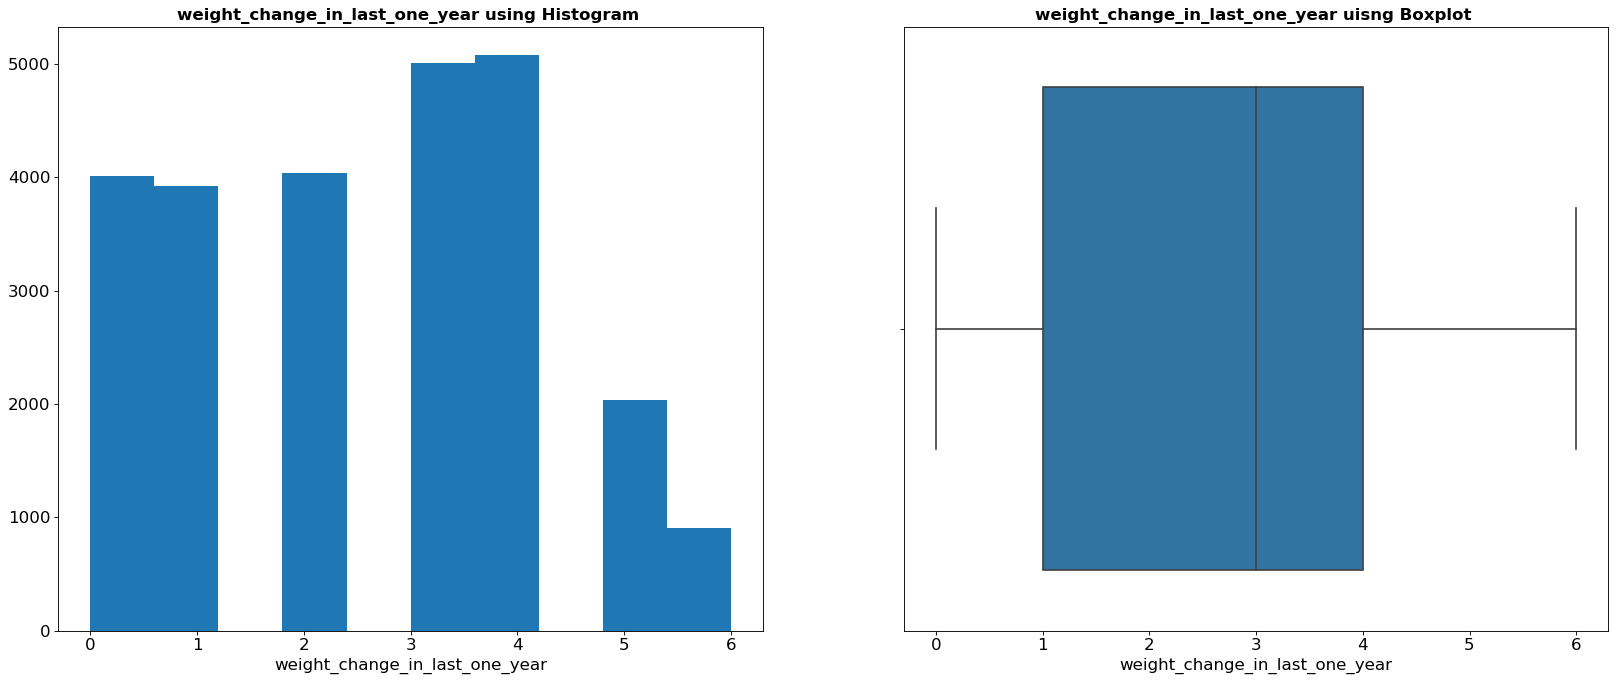

<Figure size 432x288 with 0 Axes>

In [26]:
#9.weight_change_in_last_one_year
#histogram
plt.figure(figsize=(25,10),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['weight_change_in_last_one_year'])
plt.xlabel('weight_change_in_last_one_year', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=15)
plt.title('weight_change_in_last_one_year using Histogram ', fontsize=15,fontweight='bold')

#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='weight_change_in_last_one_year',data=df)
plt.xlabel('weight_change_in_last_one_year', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('weight_change_in_last_one_year uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()


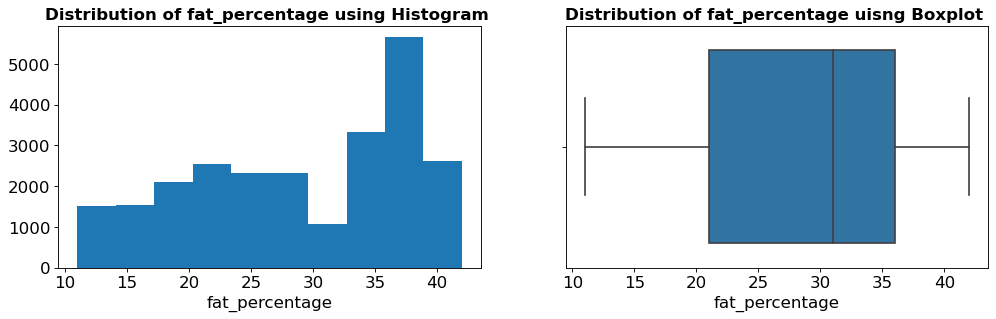

<Figure size 432x288 with 0 Axes>

In [27]:
#10.fat_percentage
#histogram
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['fat_percentage'])
plt.xlabel('fat_percentage', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=15)
plt.title('Distribution of fat_percentage using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='fat_percentage',data=df)
plt.xlabel('fat_percentage', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('Distribution of fat_percentage uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()


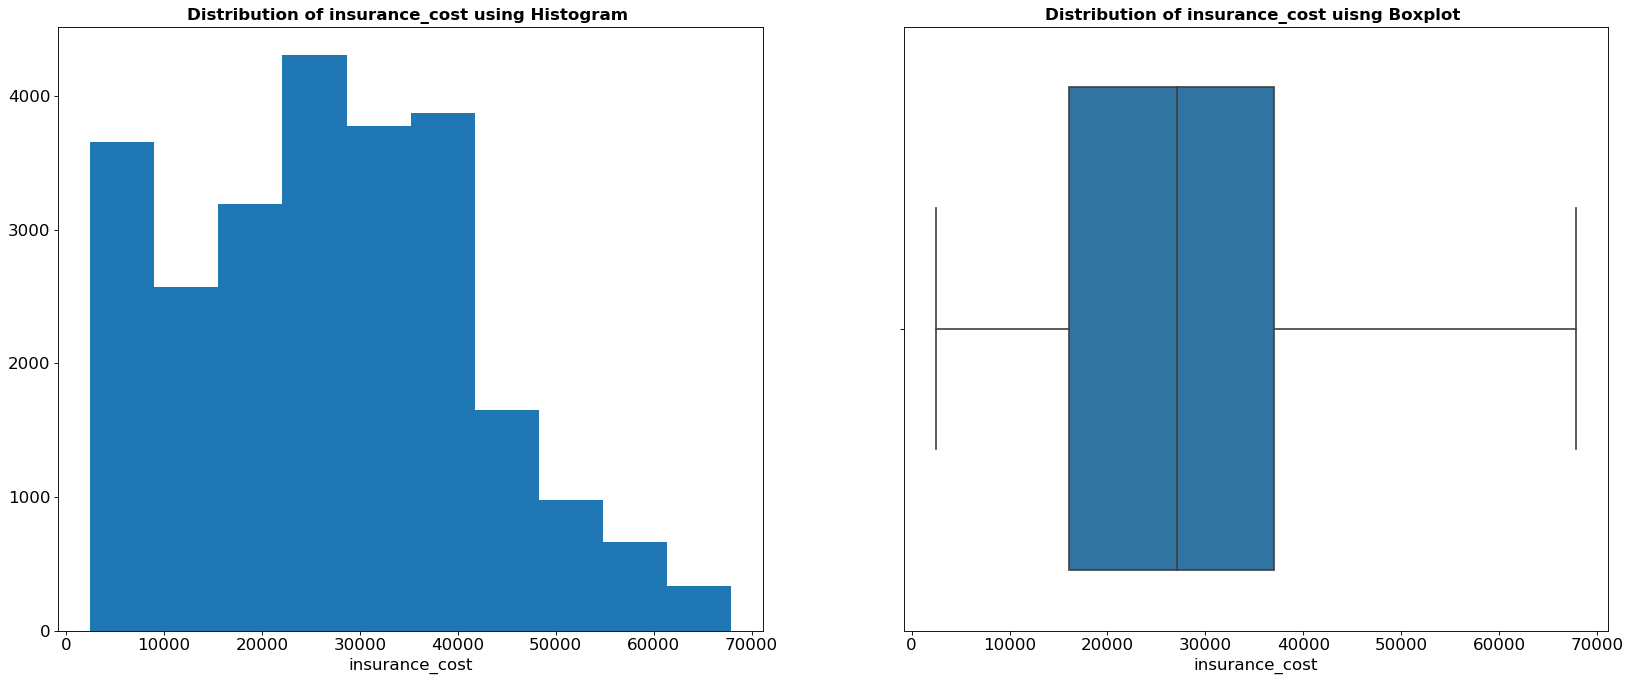

<Figure size 432x288 with 0 Axes>

In [28]:
#11.insurance_cost
#histogram
plt.figure(figsize=(25,10),dpi=80)
plt.subplot(1,2,1)
plt.hist(df['insurance_cost'])
plt.xlabel('insurance_cost', fontsize=15)
#fig.set_size_inches(18.5, 5)
plt.tick_params(labelsize=15)
plt.title('Distribution of insurance_cost using Histogram ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='insurance_cost',data=df)
plt.xlabel('insurance_cost', fontsize=15)
#fig.set_size_inches(18.5, 10.5)
plt.tick_params(labelsize=15)
plt.title('Distribution of insurance_cost uisng Boxplot ', fontsize=15,fontweight='bold')
#plt.figure(figsize=(8,6),dpi=80)
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()


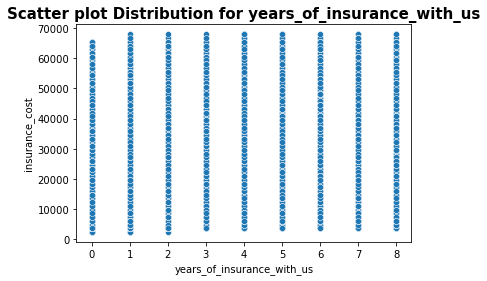

In [29]:
#bivariate analysis for continuous columns
a = sns.scatterplot(x=df['years_of_insurance_with_us'], y=df['insurance_cost'])
a.set_title("Scatter plot Distribution for years_of_insurance_with_us",fontsize=15,fontweight='bold')
plt.show()

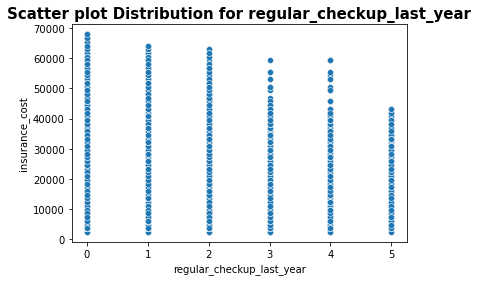

In [30]:
a = sns.scatterplot(x=df['regular_checkup_last_year'], y=df['insurance_cost'])
a.set_title("Scatter plot Distribution for regular_checkup_last_year",fontsize=15,fontweight='bold')
plt.show()

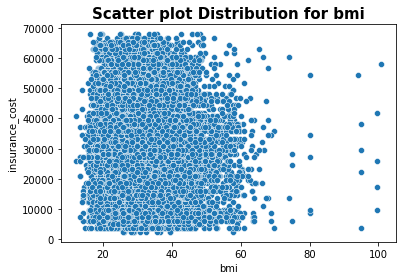

In [31]:
a = sns.scatterplot(x=df['bmi'], y=df['insurance_cost'])
a.set_title("Scatter plot Distribution for bmi",fontsize=15,fontweight='bold')
plt.show()

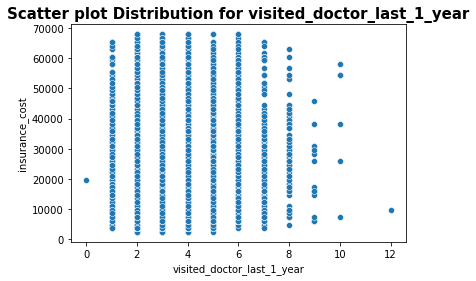

In [32]:
a = sns.scatterplot(x=df['visited_doctor_last_1_year'], y=df['insurance_cost'])
a.set_title("Scatter plot Distribution for visited_doctor_last_1_year",fontsize=15,fontweight='bold')
plt.show()

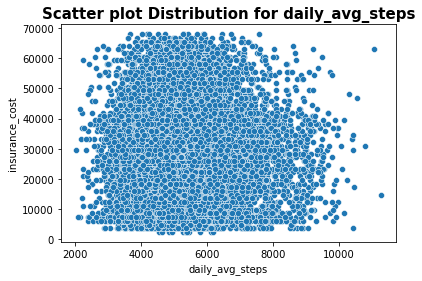

In [33]:
a = sns.scatterplot(x=df['daily_avg_steps'], y=df['insurance_cost'])
a.set_title("Scatter plot Distribution for daily_avg_steps",fontsize=15,fontweight='bold')
plt.show()

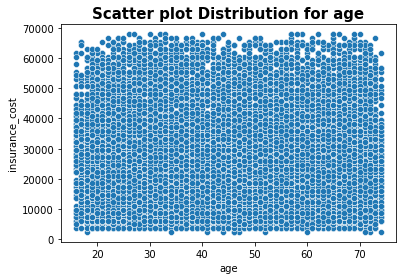

In [34]:
a = sns.scatterplot(x=df['age'], y=df['insurance_cost'])
a.set_title("Scatter plot Distribution for age",fontsize=15,fontweight='bold')
plt.show()

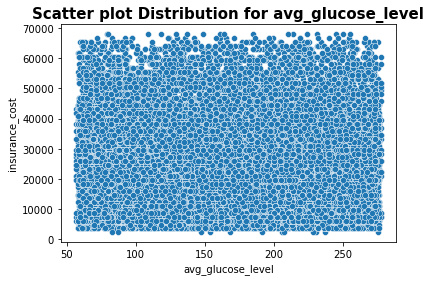

In [35]:
a = sns.scatterplot(x=df['avg_glucose_level'], y=df['insurance_cost'])
a.set_title("Scatter plot Distribution for avg_glucose_level",fontsize=15,fontweight='bold')
plt.show()

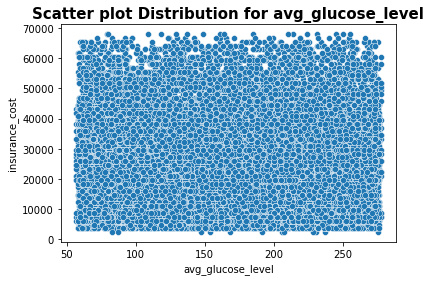

In [36]:
a = sns.scatterplot(x=df['avg_glucose_level'], y=df['insurance_cost'])
a.set_title("Scatter plot Distribution for avg_glucose_level",fontsize=15,fontweight='bold')
plt.show()

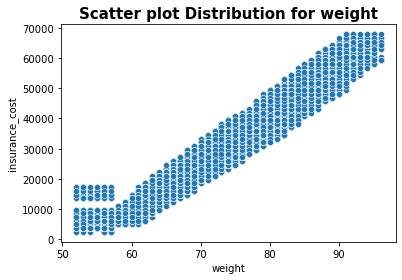

In [37]:
a = sns.scatterplot(x=df['weight'], y=df['insurance_cost'])
a.set_title("Scatter plot Distribution for weight",fontsize=15,fontweight='bold')
plt.show()

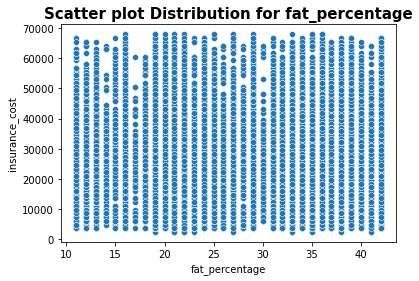

In [38]:
a = sns.scatterplot(x=df['fat_percentage'], y=df['insurance_cost'])
a.set_title("Scatter plot Distribution for fat_percentage",fontsize=15,fontweight='bold')
plt.show()

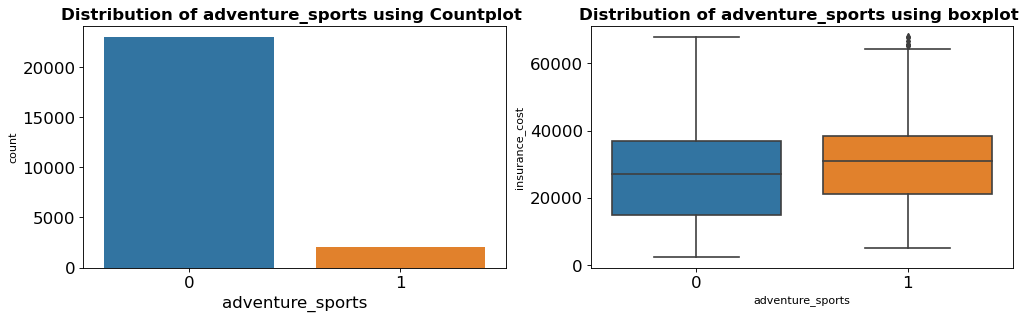

<Figure size 432x288 with 0 Axes>

In [39]:
#EDA for categorical variables
#Count plot and Box plot
#1.adventure_sports
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df, x ='adventure_sports')
plt.xlabel('adventure_sports', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of adventure_sports using Countplot ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='adventure_sports',y='insurance_cost',data=df)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of adventure_sports using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()


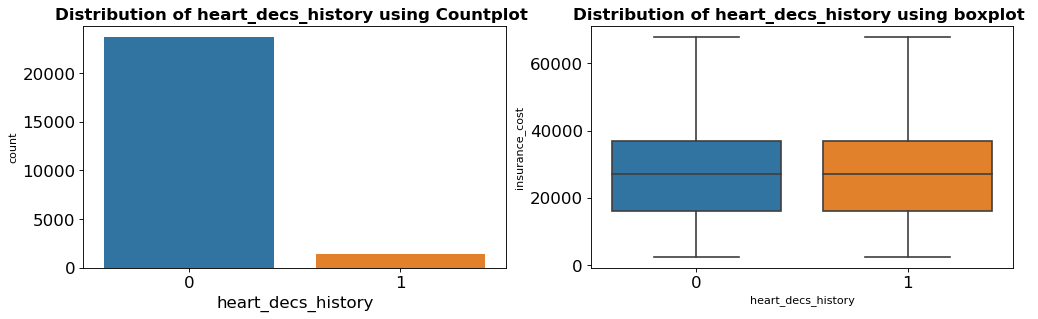

<Figure size 432x288 with 0 Axes>

In [40]:
#2.heart_decs_history
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df, x ='heart_decs_history')
plt.xlabel('heart_decs_history', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of heart_decs_history using Countplot ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='heart_decs_history',y='insurance_cost',data=df)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of heart_decs_history using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()


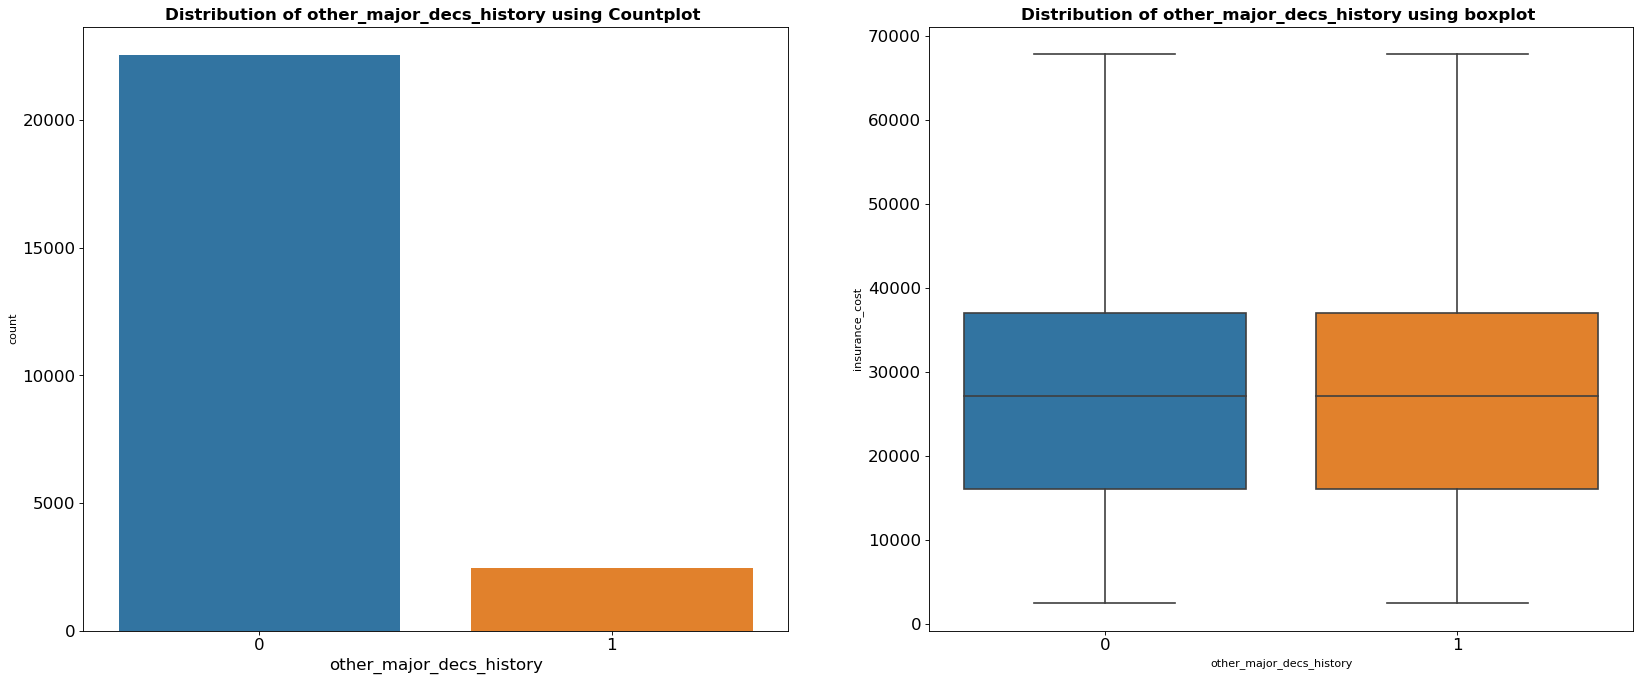

<Figure size 432x288 with 0 Axes>

In [41]:
#3.other_major_decs_history
#countplot
plt.figure(figsize=(25,10),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df, x ='other_major_decs_history')
plt.xlabel('other_major_decs_history', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of other_major_decs_history using Countplot ', fontsize=15,fontweight='bold')


#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='other_major_decs_history',y='insurance_cost',data=df)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of other_major_decs_history using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()


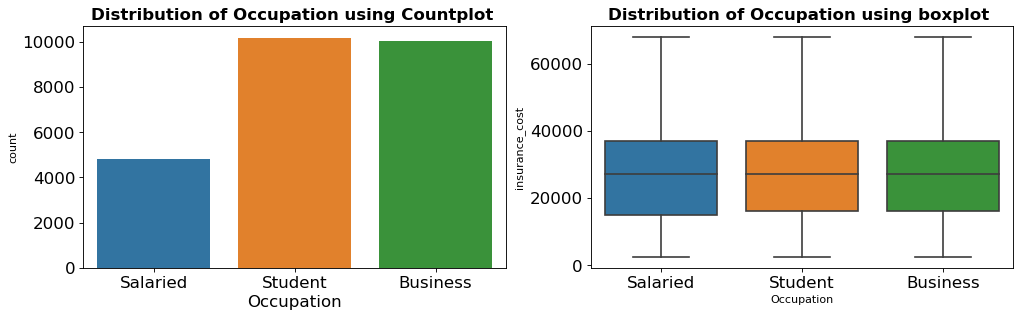

<Figure size 432x288 with 0 Axes>

In [42]:
#4.Occupation
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df, x ='Occupation')
plt.xlabel('Occupation', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Occupation using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Occupation',y='insurance_cost',data=df)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Occupation using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()


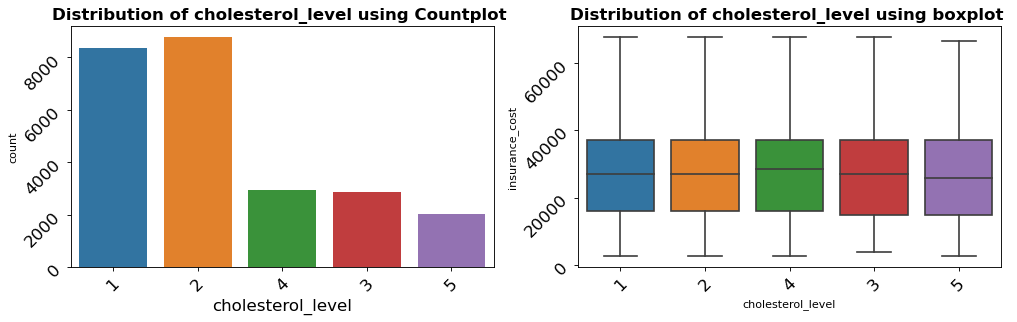

<Figure size 432x288 with 0 Axes>

In [242]:
#5.cholesterol_level
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df, x ='cholesterol_level')
plt.xlabel('cholesterol_level', fontsize=15)
plt.tick_params(rotation=45, labelsize=15)
plt.title('Distribution of cholesterol_level using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='cholesterol_level',y='insurance_cost',data=df)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(rotation=45, labelsize=15)
plt.title('Distribution of cholesterol_level using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()


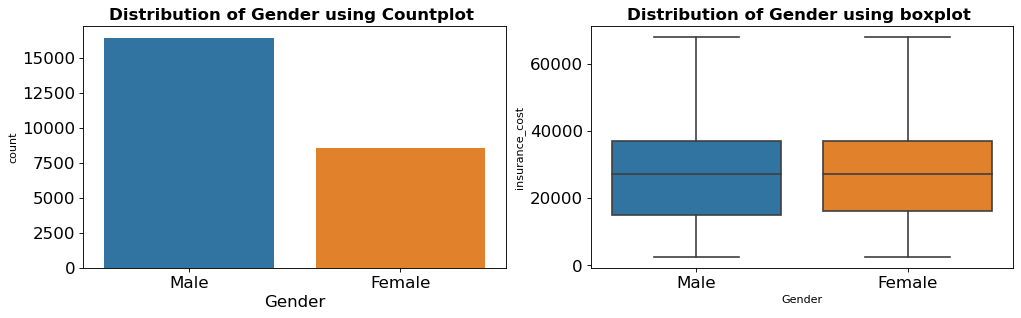

<Figure size 432x288 with 0 Axes>

In [44]:
#6.Gender
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df, x ='Gender')
plt.xlabel('Gender', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Gender using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Gender',y='insurance_cost',data=df)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Gender using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()


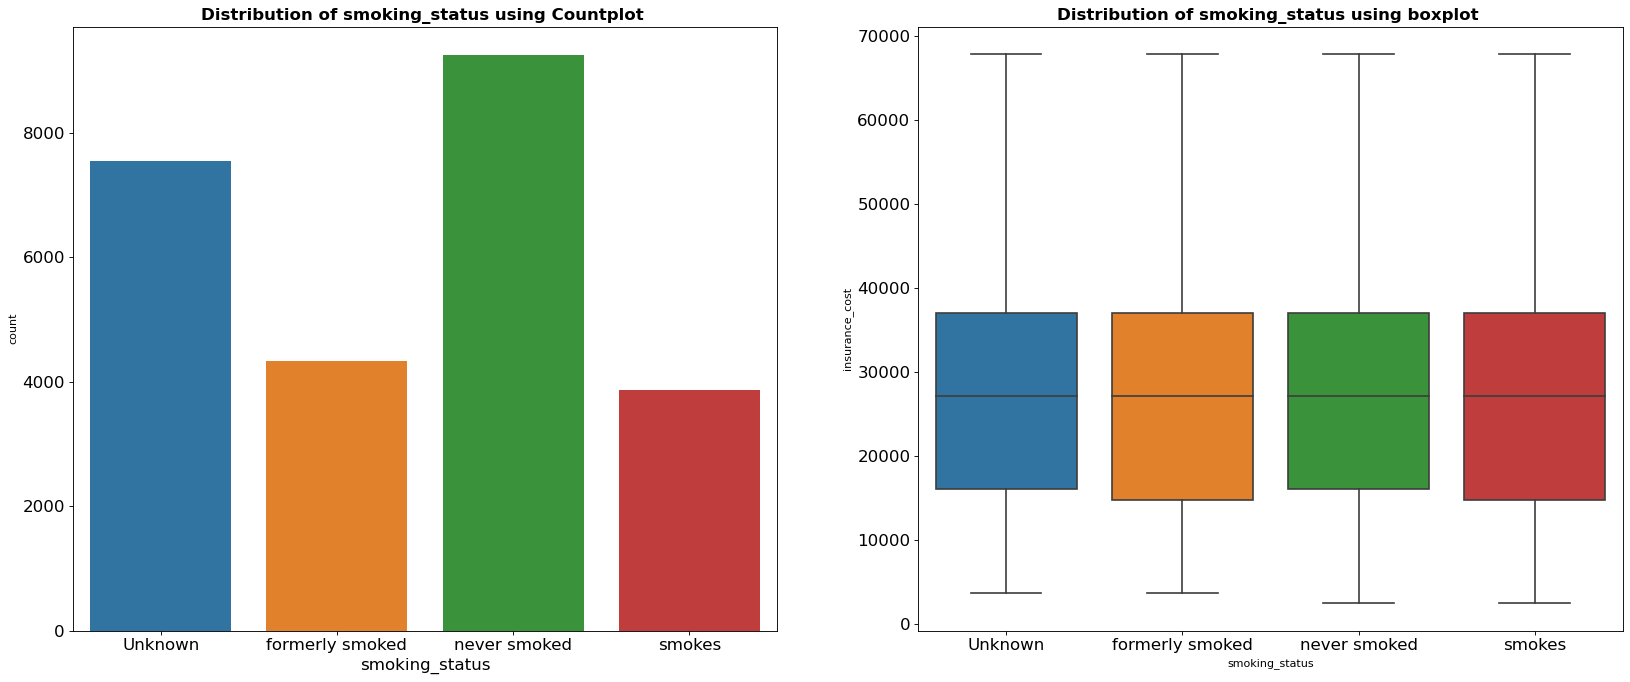

<Figure size 432x288 with 0 Axes>

In [45]:
#7.smoking_status
#countplot
plt.figure(figsize=(25,10),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df, x ='smoking_status')
plt.xlabel('smoking_status', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of smoking_status using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='smoking_status',y='insurance_cost',data=df)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of smoking_status using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()


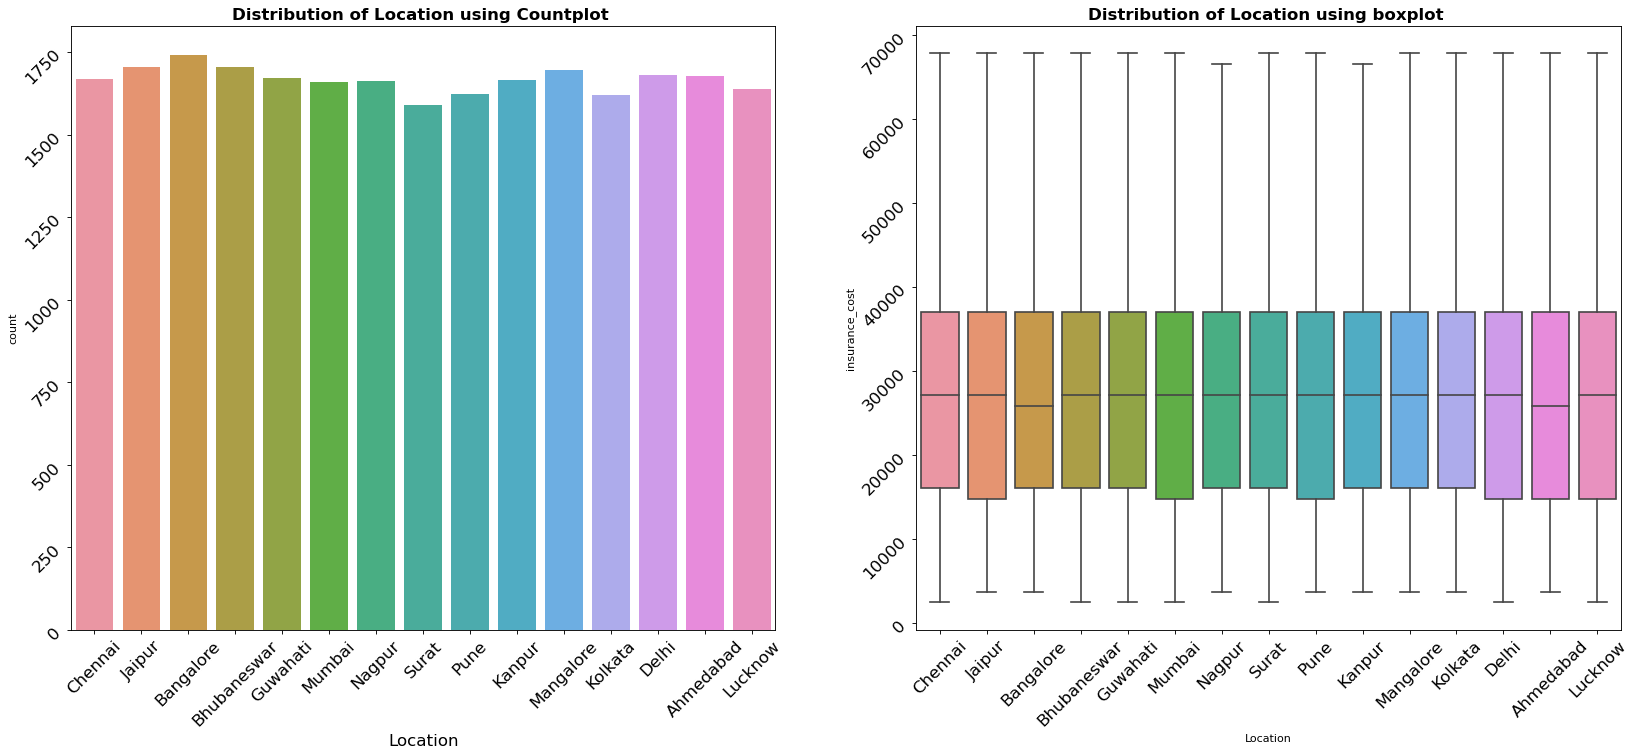

<Figure size 432x288 with 0 Axes>

In [52]:
#8.Location
#countplot
plt.figure(figsize=(25,10),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df, x ='Location')
plt.xlabel('Location', fontsize=15)
plt.tick_params(rotation=45, labelsize=15)
plt.title('Distribution of Location using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Location',y='insurance_cost',data=df)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(rotation=45,labelsize=15)
plt.title('Distribution of Location using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()

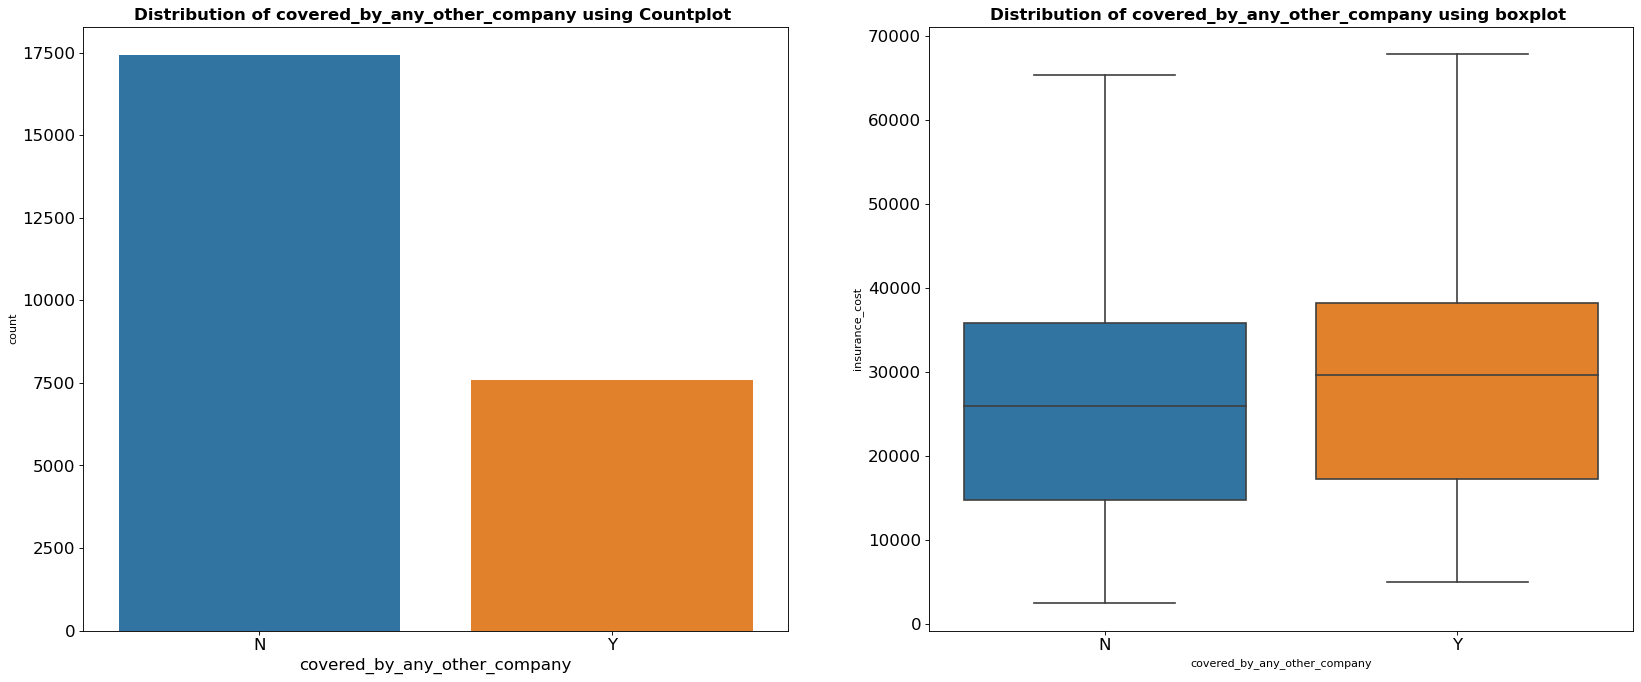

<Figure size 432x288 with 0 Axes>

In [53]:
#9.covered_by_any_other_company
#countplot
plt.figure(figsize=(25,10),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df, x ='covered_by_any_other_company')
plt.xlabel('covered_by_any_other_company', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of covered_by_any_other_company using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='covered_by_any_other_company',y='insurance_cost',data=df)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of covered_by_any_other_company using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()


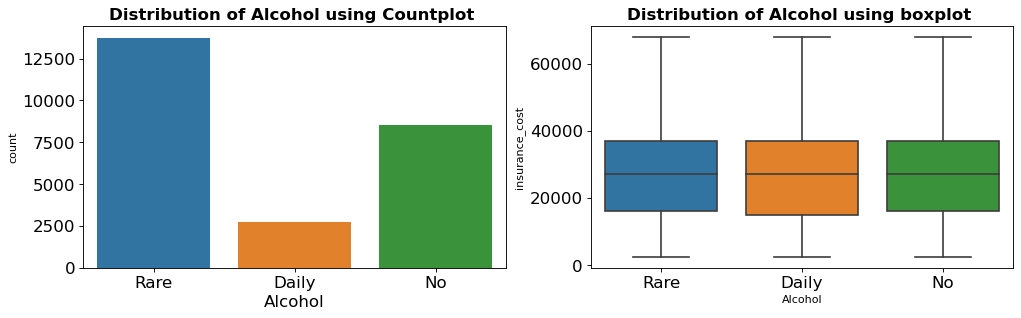

<Figure size 432x288 with 0 Axes>

In [54]:
#10.Alcohol
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df, x ='Alcohol')
plt.xlabel('Alcohol', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Alcohol using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Alcohol',y='insurance_cost',data=df)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of Alcohol using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()


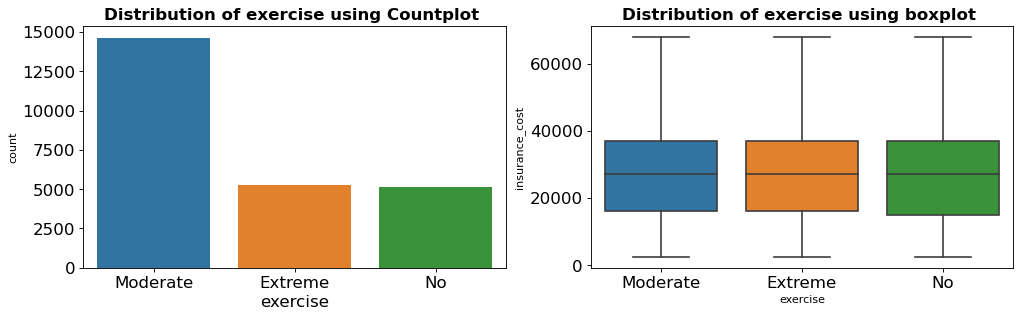

<Figure size 432x288 with 0 Axes>

In [55]:
#11.Exercise
#countplot
plt.figure(figsize=(15,4),dpi=80)
plt.subplot(1,2,1)
sns.countplot(data = df, x ='exercise')
plt.xlabel('exercise', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of exercise using Countplot ', fontsize=15,fontweight='bold')



#boxplot
plt.subplot(1,2,2)
sns.boxplot(x='exercise',y='insurance_cost',data=df)
#plt.xlabel('Sales', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Distribution of exercise using boxplot ', fontsize=15,fontweight='bold')
plt.show()

plt.subplots_adjust(wspace=0.05)
plt.tight_layout()


In [56]:
# dropping unwanted variable applicant_id,'Year_last_admitted'.

In [57]:
df.drop(columns=['Year_last_admitted','applicant_id'],inplace=True)
df.head()

,years_of_insurance_with_us,regular_checkup_last_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,Gender,avg_glucose_level,bmi,smoking_status,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,3,1,1,Salaried,2,125 to 150,4866,28,1,0,Male,97,31.20,Unknown,Chennai,67,N,Rare,Moderate,1,25,20978
1,0,0,0,Student,4,150 to 175,6411,50,0,0,Male,212,34.20,formerly smoked,Jaipur,58,N,Rare,Moderate,3,27,6170
2,1,0,0,Business,4,200 to 225,4509,68,0,0,Female,166,40.40,formerly smoked,Jaipur,73,N,Daily,Extreme,0,32,28382
3,7,4,0,Business,2,175 to 200,6214,51,0,0,Female,109,22.90,Unknown,Chennai,71,Y,Rare,No,3,37,27148
4,3,1,0,Student,2,150 to 175,4938,44,0,1,Male,118,26.50,never smoked,Bangalore,74,N,No,Extreme,0,34,29616


In [58]:
#encoding of the categorical variables
df['cholesterol_level']=np.where(df['cholesterol_level'] =='125 to 150', '1', df['cholesterol_level'])
df['cholesterol_level']=np.where(df['cholesterol_level'] =='150 to 175', '2', df['cholesterol_level'])
df['cholesterol_level']=np.where(df['cholesterol_level'] =='175 to 200', '3', df['cholesterol_level'])
df['cholesterol_level']=np.where(df['cholesterol_level'] =='200 to 225', '4', df['cholesterol_level'])
df['cholesterol_level']=np.where(df['cholesterol_level'] =='225 to 250', '5', df['cholesterol_level'])


In [59]:
df['Location'].replace(to_replace ="Surat",value ="1",inplace=True)
df['Location'].replace(to_replace ="Kolkata",value ="2",inplace=True)
df['Location'].replace(to_replace ="Pune",value ="3",inplace=True)
df['Location'].replace(to_replace ="Lucknow",value ="4",inplace=True)
df['Location'].replace(to_replace ="Mumbai",value ="5",inplace=True)
df['Location'].replace(to_replace ="Nagpur",value ="6",inplace=True)
df['Location'].replace(to_replace ="Kanpur",value ="7",inplace=True)
df['Location'].replace(to_replace ="Chennai",value ="8",inplace=True)
df['Location'].replace(to_replace ="Guwahati",value ="9",inplace=True)
df['Location'].replace(to_replace ="Ahmedabad",value ="10",inplace=True)
df['Location'].replace(to_replace ="Delhi",value ="11",inplace=True)
df['Location'].replace(to_replace ="Mangalore",value ="12",inplace=True)
df['Location'].replace(to_replace ="Bhubaneswar",value ="13",inplace=True)
df['Location'].replace(to_replace ="Jaipur",value ="14",inplace=True)
df['Location'].replace(to_replace ="Bangalore",value ="15",inplace=True)

In [60]:
#df1=pd.get_dummies(df,columns=cat1,drop_first=True)
df_new=pd.get_dummies(df,columns=['Occupation','Gender','smoking_status','covered_by_any_other_company','Alcohol','exercise'],drop_first=True)

In [61]:
df_new.head()

,years_of_insurance_with_us,regular_checkup_last_year,adventure_sports,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,avg_glucose_level,bmi,Location,weight,weight_change_in_last_one_year,fat_percentage,insurance_cost,Occupation_Salaried,Occupation_Student,Gender_Male,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,covered_by_any_other_company_Y,Alcohol_No,Alcohol_Rare,exercise_Moderate,exercise_No
0,3,1,1,2,1,4866,28,1,0,97,31.20,8,67,1,25,20978,1,0,1,0,0,0,0,0,1,1,0
1,0,0,0,4,2,6411,50,0,0,212,34.20,14,58,3,27,6170,0,1,1,1,0,0,0,0,1,1,0
2,1,0,0,4,4,4509,68,0,0,166,40.40,14,73,0,32,28382,0,0,0,1,0,0,0,0,0,0,0
3,7,4,0,2,3,6214,51,0,0,109,22.90,8,71,3,37,27148,0,0,0,0,0,0,1,0,1,0,1
4,3,1,0,2,2,4938,44,0,1,118,26.50,15,74,0,34,29616,0,1,1,0,1,0,0,1,0,0,0


In [62]:
df_new.head().T

,0,1,2,3,4
years_of_insurance_with_us,3,0,1,7,3
regular_checkup_last_year,1,0,0,4,1
adventure_sports,1,0,0,0,0
visited_doctor_last_1_year,2,4,4,2,2
cholesterol_level,1,2,4,3,2
daily_avg_steps,4866,6411,4509,6214,4938
age,28,50,68,51,44
heart_decs_history,1,0,0,0,0
other_major_decs_history,0,0,0,0,1
avg_glucose_level,97,212,166,109,118


In [63]:
df_new.columns

Index(['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'cholesterol_level',
       'daily_avg_steps', 'age', 'heart_decs_history',
       'other_major_decs_history', 'avg_glucose_level', 'bmi', 'Location',
       'weight', 'weight_change_in_last_one_year', 'fat_percentage',
       'insurance_cost', 'Occupation_Salaried', 'Occupation_Student',
       'Gender_Male', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'covered_by_any_other_company_Y', 'Alcohol_No', 'Alcohol_Rare',
       'exercise_Moderate', 'exercise_No'],
      dtype='object')

In [64]:
#Missing value treatment
df.isnull().sum()

years_of_insurance_with_us          0
regular_checkup_last_year           0
adventure_sports                    0
Occupation                          0
visited_doctor_last_1_year          0
cholesterol_level                   0
daily_avg_steps                     0
age                                 0
heart_decs_history                  0
other_major_decs_history            0
Gender                              0
avg_glucose_level                   0
bmi                               990
smoking_status                      0
Location                            0
weight                              0
covered_by_any_other_company        0
Alcohol                             0
exercise                            0
weight_change_in_last_one_year      0
fat_percentage                      0
insurance_cost                      0
dtype: int64

In [65]:
predictors = df_new.drop('insurance_cost', axis = 1)
response = df_new['insurance_cost']

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)


In [67]:
df1 = pd.concat([scaled_predictors, response], axis = 1)

In [68]:
from sklearn.impute import KNNImputer #MICE FancyImpute

In [69]:
imputer = KNNImputer(n_neighbors=10)

In [70]:
df_imputed = pd.DataFrame(imputer.fit_transform(df1), columns = df1.columns)

In [71]:
df_imputed.isnull().sum()

years_of_insurance_with_us        0
regular_checkup_last_year         0
adventure_sports                  0
visited_doctor_last_1_year        0
cholesterol_level                 0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
avg_glucose_level                 0
bmi                               0
Location                          0
weight                            0
weight_change_in_last_one_year    0
fat_percentage                    0
Occupation_Salaried               0
Occupation_Student                0
Gender_Male                       0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
covered_by_any_other_company_Y    0
Alcohol_No                        0
Alcohol_Rare                      0
exercise_Moderate                 0
exercise_No                       0
insurance_cost                    0
dtype: int64

In [72]:
df_imputed['cholesterol_level']=df_new['cholesterol_level']

In [73]:
df_imputed.columns

Index(['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'cholesterol_level',
       'daily_avg_steps', 'age', 'heart_decs_history',
       'other_major_decs_history', 'avg_glucose_level', 'bmi', 'Location',
       'weight', 'weight_change_in_last_one_year', 'fat_percentage',
       'Occupation_Salaried', 'Occupation_Student', 'Gender_Male',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'covered_by_any_other_company_Y', 'Alcohol_No',
       'Alcohol_Rare', 'exercise_Moderate', 'exercise_No', 'insurance_cost'],
      dtype='object')

In [74]:
df_imputed.isnull().sum()

years_of_insurance_with_us        0
regular_checkup_last_year         0
adventure_sports                  0
visited_doctor_last_1_year        0
cholesterol_level                 0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
avg_glucose_level                 0
bmi                               0
Location                          0
weight                            0
weight_change_in_last_one_year    0
fat_percentage                    0
Occupation_Salaried               0
Occupation_Student                0
Gender_Male                       0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
covered_by_any_other_company_Y    0
Alcohol_No                        0
Alcohol_Rare                      0
exercise_Moderate                 0
exercise_No                       0
insurance_cost                    0
dtype: int64

In [75]:
df_imputed.dtypes

years_of_insurance_with_us        float64
regular_checkup_last_year         float64
adventure_sports                  float64
visited_doctor_last_1_year        float64
cholesterol_level                  object
daily_avg_steps                   float64
age                               float64
heart_decs_history                float64
other_major_decs_history          float64
avg_glucose_level                 float64
bmi                               float64
Location                          float64
weight                            float64
weight_change_in_last_one_year    float64
fat_percentage                    float64
Occupation_Salaried               float64
Occupation_Student                float64
Gender_Male                       float64
smoking_status_formerly smoked    float64
smoking_status_never smoked       float64
smoking_status_smokes             float64
covered_by_any_other_company_Y    float64
Alcohol_No                        float64
Alcohol_Rare                      

In [76]:
df_imputed['cholesterol_level'] = df_imputed['cholesterol_level'].astype('float64')  # converting the cholesterol_level column from object / string type to float

In [77]:
df_imputed.dtypes

years_of_insurance_with_us        float64
regular_checkup_last_year         float64
adventure_sports                  float64
visited_doctor_last_1_year        float64
cholesterol_level                 float64
daily_avg_steps                   float64
age                               float64
heart_decs_history                float64
other_major_decs_history          float64
avg_glucose_level                 float64
bmi                               float64
Location                          float64
weight                            float64
weight_change_in_last_one_year    float64
fat_percentage                    float64
Occupation_Salaried               float64
Occupation_Student                float64
Gender_Male                       float64
smoking_status_formerly smoked    float64
smoking_status_never smoked       float64
smoking_status_smokes             float64
covered_by_any_other_company_Y    float64
Alcohol_No                        float64
Alcohol_Rare                      

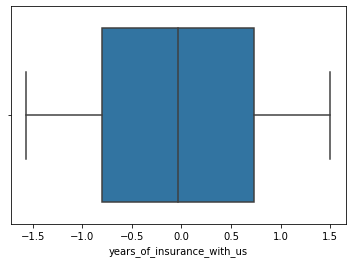

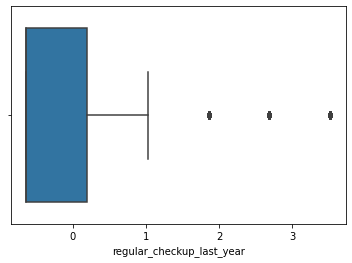

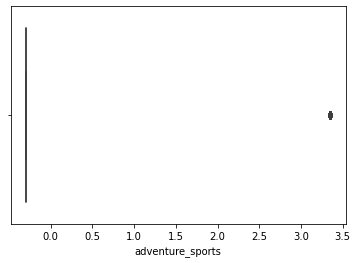

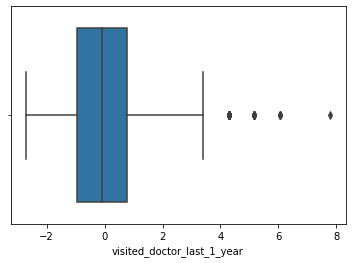

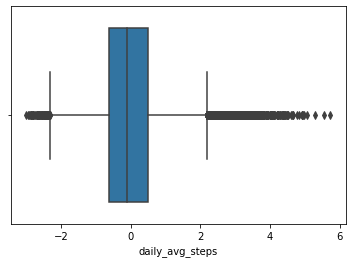

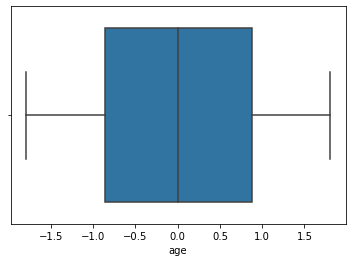

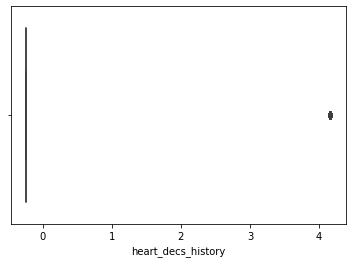

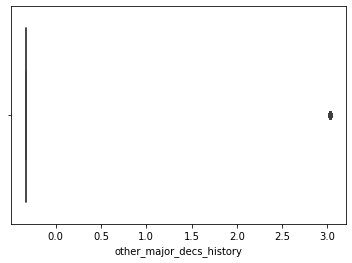

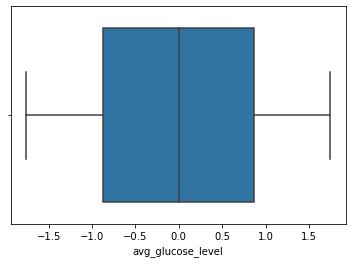

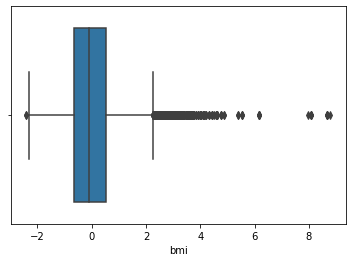

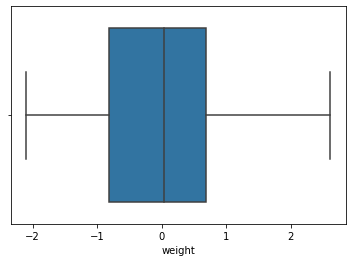

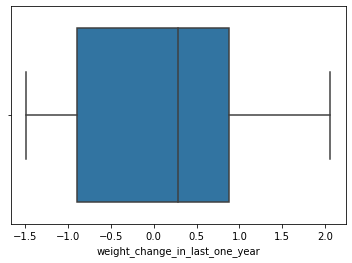

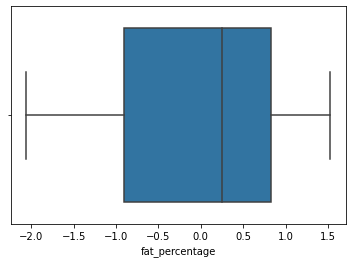

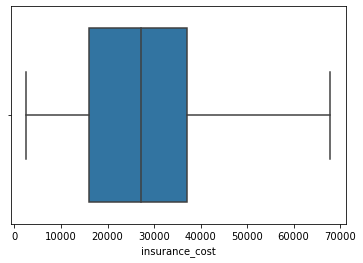

In [78]:
#Outlier treatment
#Checking for outliers

cols = ['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports','visited_doctor_last_1_year',
        'daily_avg_steps', 'age', 'heart_decs_history',
       'other_major_decs_history', 'avg_glucose_level', 'bmi',
        'weight',
        'weight_change_in_last_one_year',
       'fat_percentage','insurance_cost']
for i in cols:
    sns.boxplot(df_imputed[i],whis=1.5)
    plt.show();

In [79]:
### Outlier treatment :
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [80]:
for column in df_imputed[cols].columns:
    lr,ur=remove_outlier(df_imputed[column])
    df_imputed[column]=np.where(df_imputed[column]>ur,ur,df_imputed[column])
    df_imputed[column]=np.where(df_imputed[column]<lr,lr,df_imputed[column])

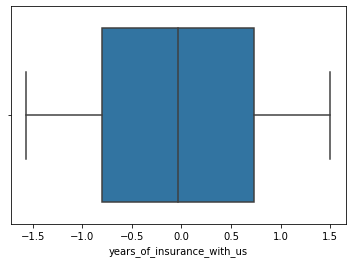

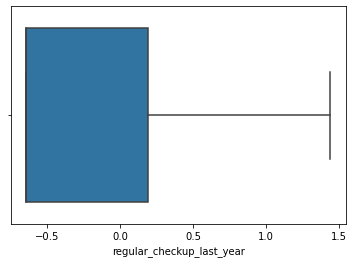

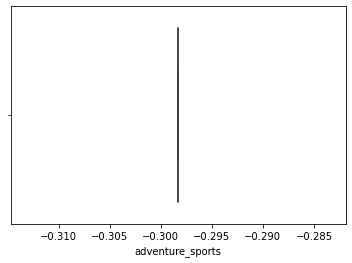

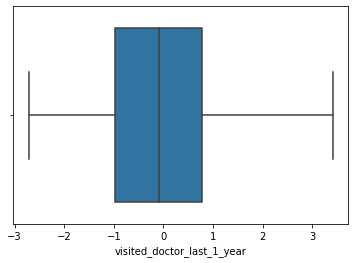

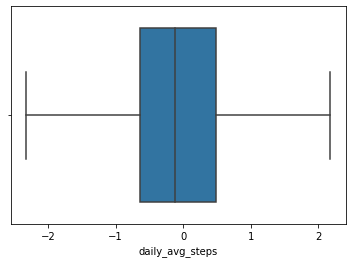

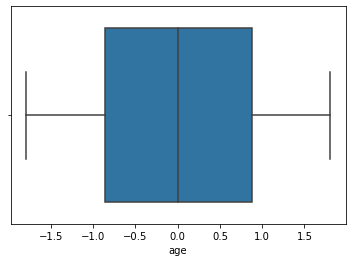

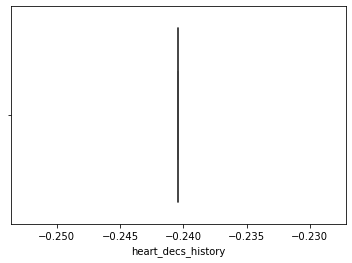

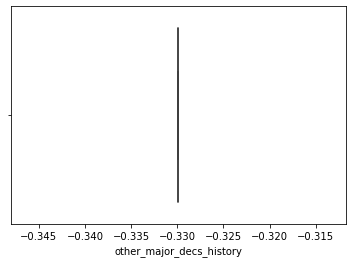

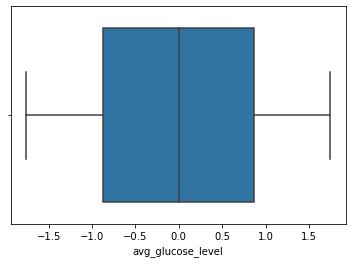

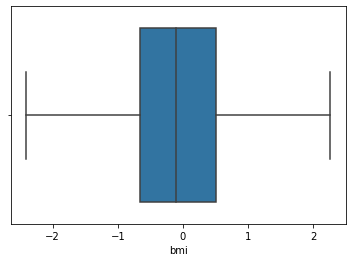

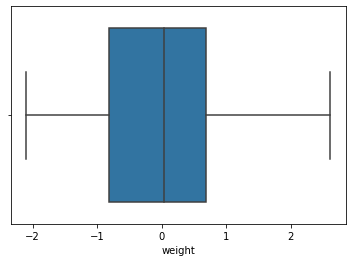

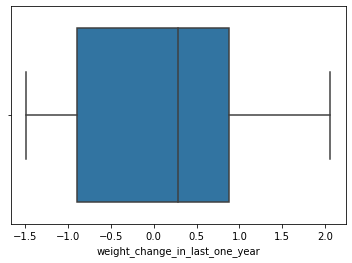

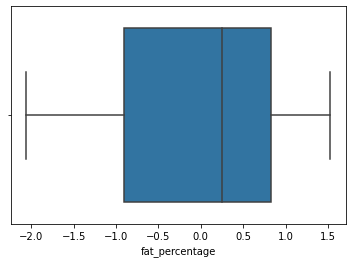

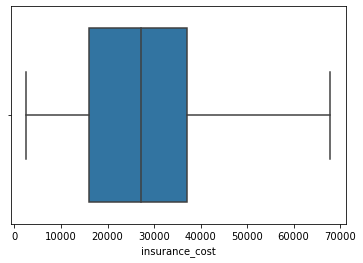

In [81]:
cols = ['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports','visited_doctor_last_1_year',
        'daily_avg_steps', 'age', 'heart_decs_history',
       'other_major_decs_history', 'avg_glucose_level', 'bmi',
        'weight',
        'weight_change_in_last_one_year',
       'fat_percentage','insurance_cost' ]
for i in cols:
    sns.boxplot(df_imputed[i],whis=1.5)
    plt.show();

In [82]:
#Variable transformation
 #Input dataset
X_log = np.log(df_imputed['age'].values.reshape(-1,1))
X1_log = np.log(df_imputed['bmi'].values.reshape(-1,1))
X2_log = np.log(df_imputed['daily_avg_steps'].values.reshape(-1,1))
# Output or Predicted Value of data
#y_log = emp_data['Churn_out_rate'].values.reshape(-1,1)

In [83]:
X1_log 

array([[        nan],
       [-1.0318677 ],
       [ 0.13409844],
       ...,
       [-0.79223421],
       [        nan],
       [ 0.25917443]])

In [84]:
X_log

array([[        nan],
       [-1.1536226 ],
       [ 0.35977471],
       ...,
       [        nan],
       [        nan],
       [        nan]])

In [85]:
X2_log

array([[        nan],
       [ 0.12644488],
       [        nan],
       ...,
       [-0.94801079],
       [ 0.77876927],
       [-0.45809336]])

<Figure size 432x288 with 0 Axes>

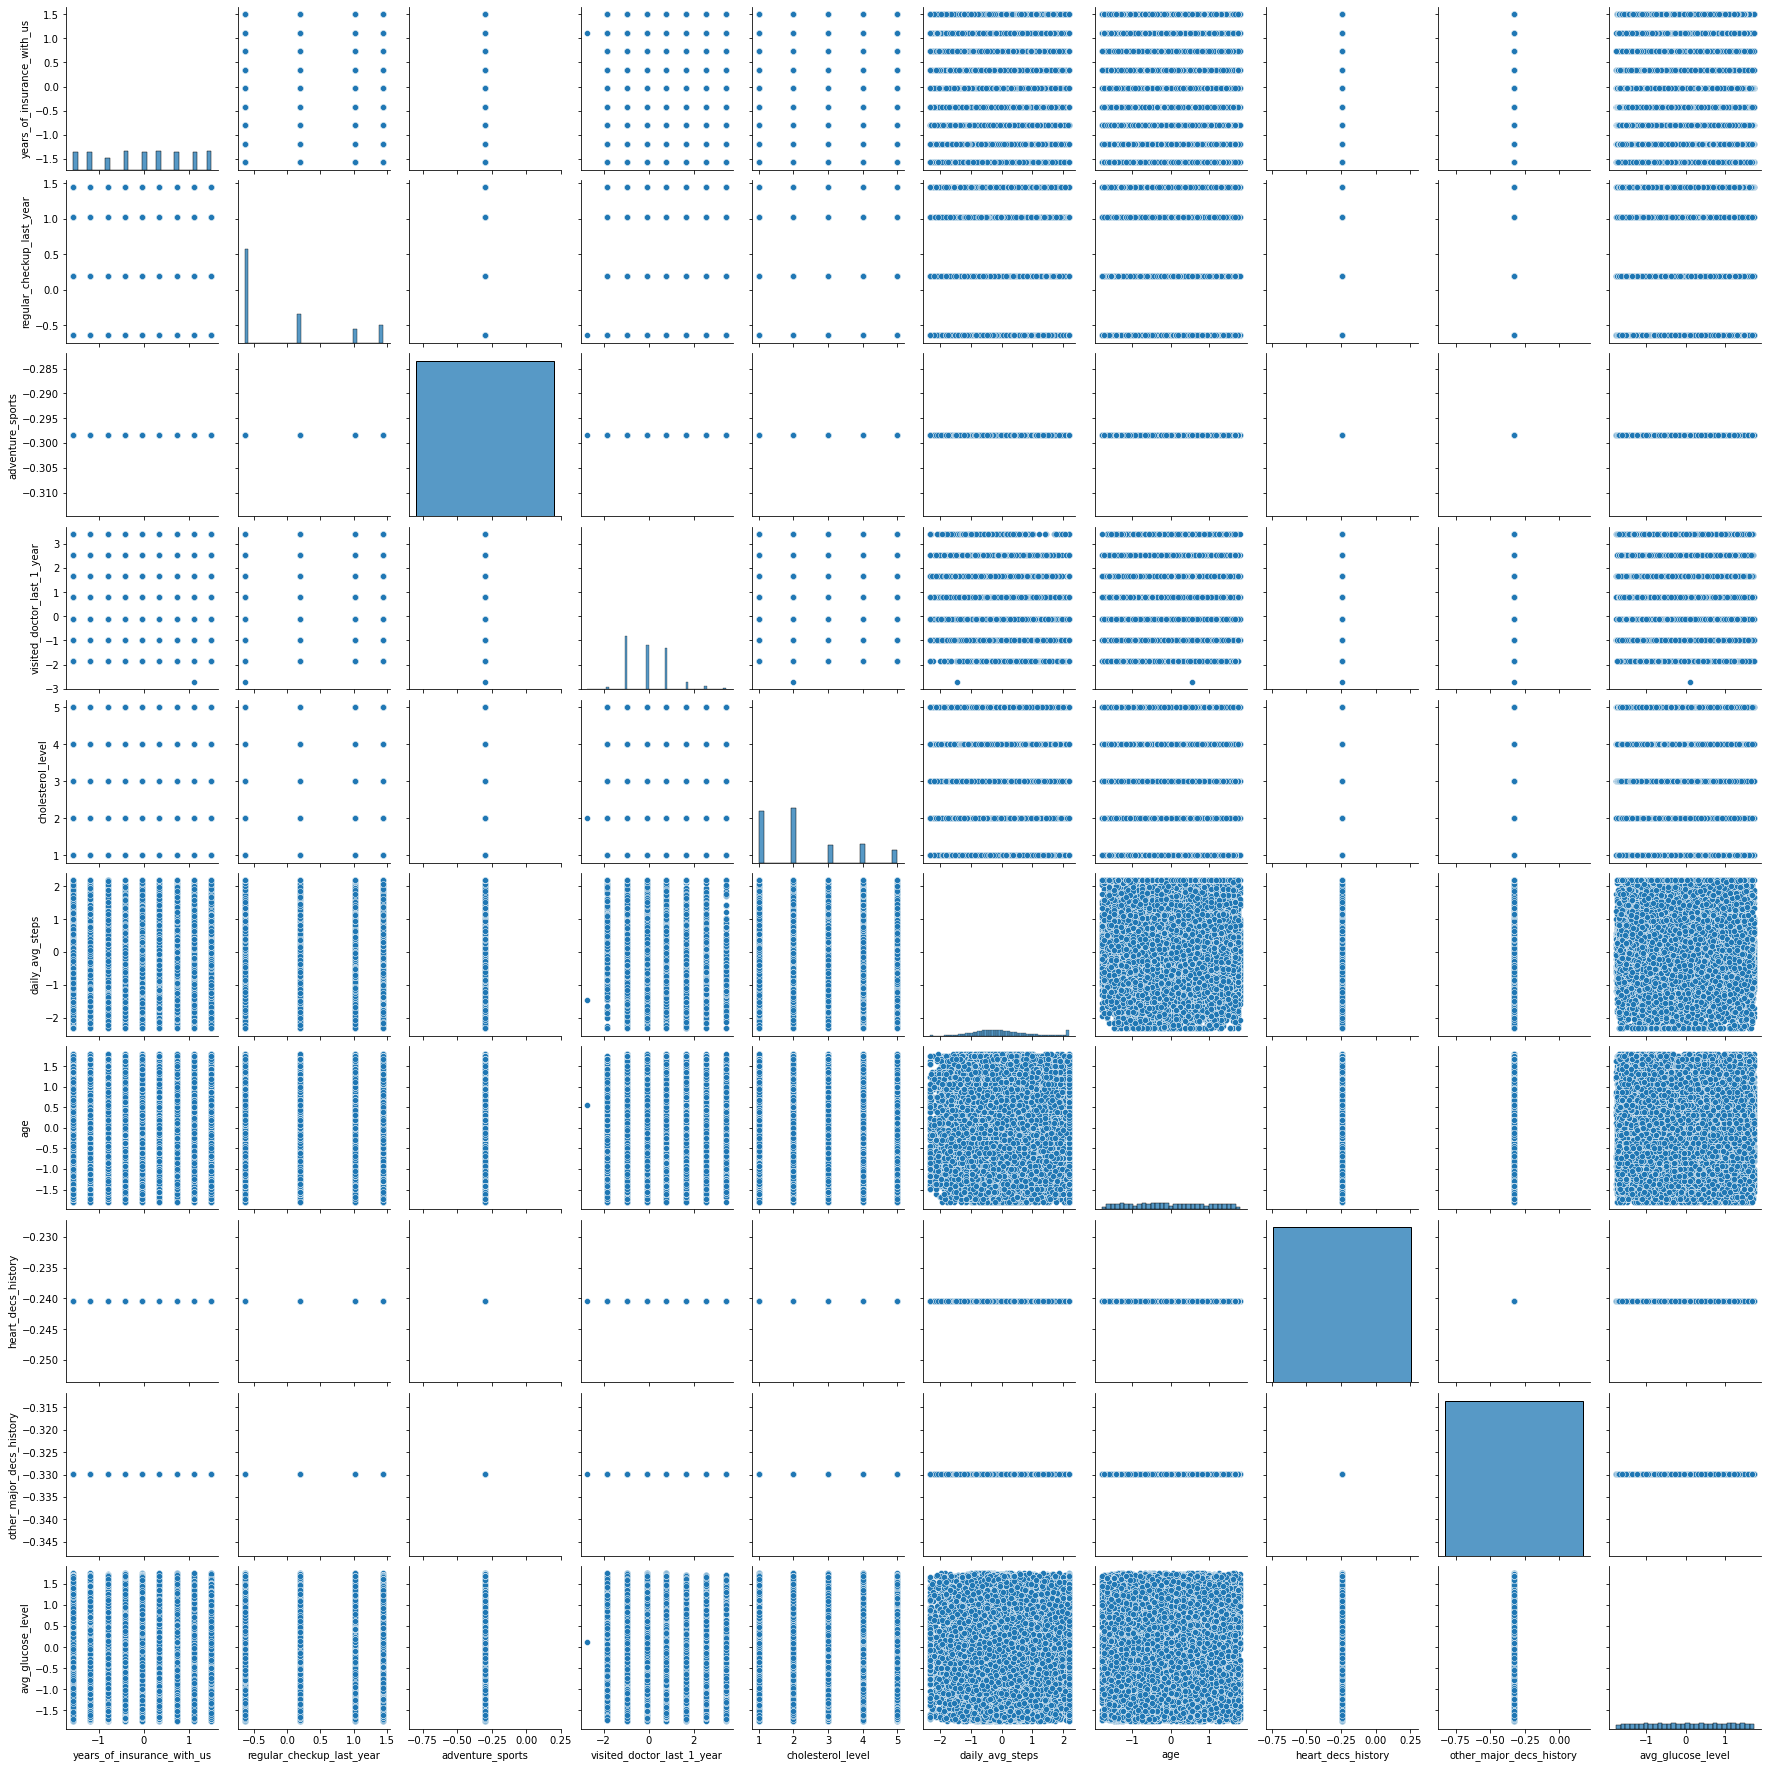

In [71]:
# Ploting the pairplot for columns 0 to 10
plt.figure()
cols_to_plot = df_imputed.columns[0:10].tolist() 
sns.pairplot(df_imputed[cols_to_plot])
plt.show()


<Figure size 432x288 with 0 Axes>

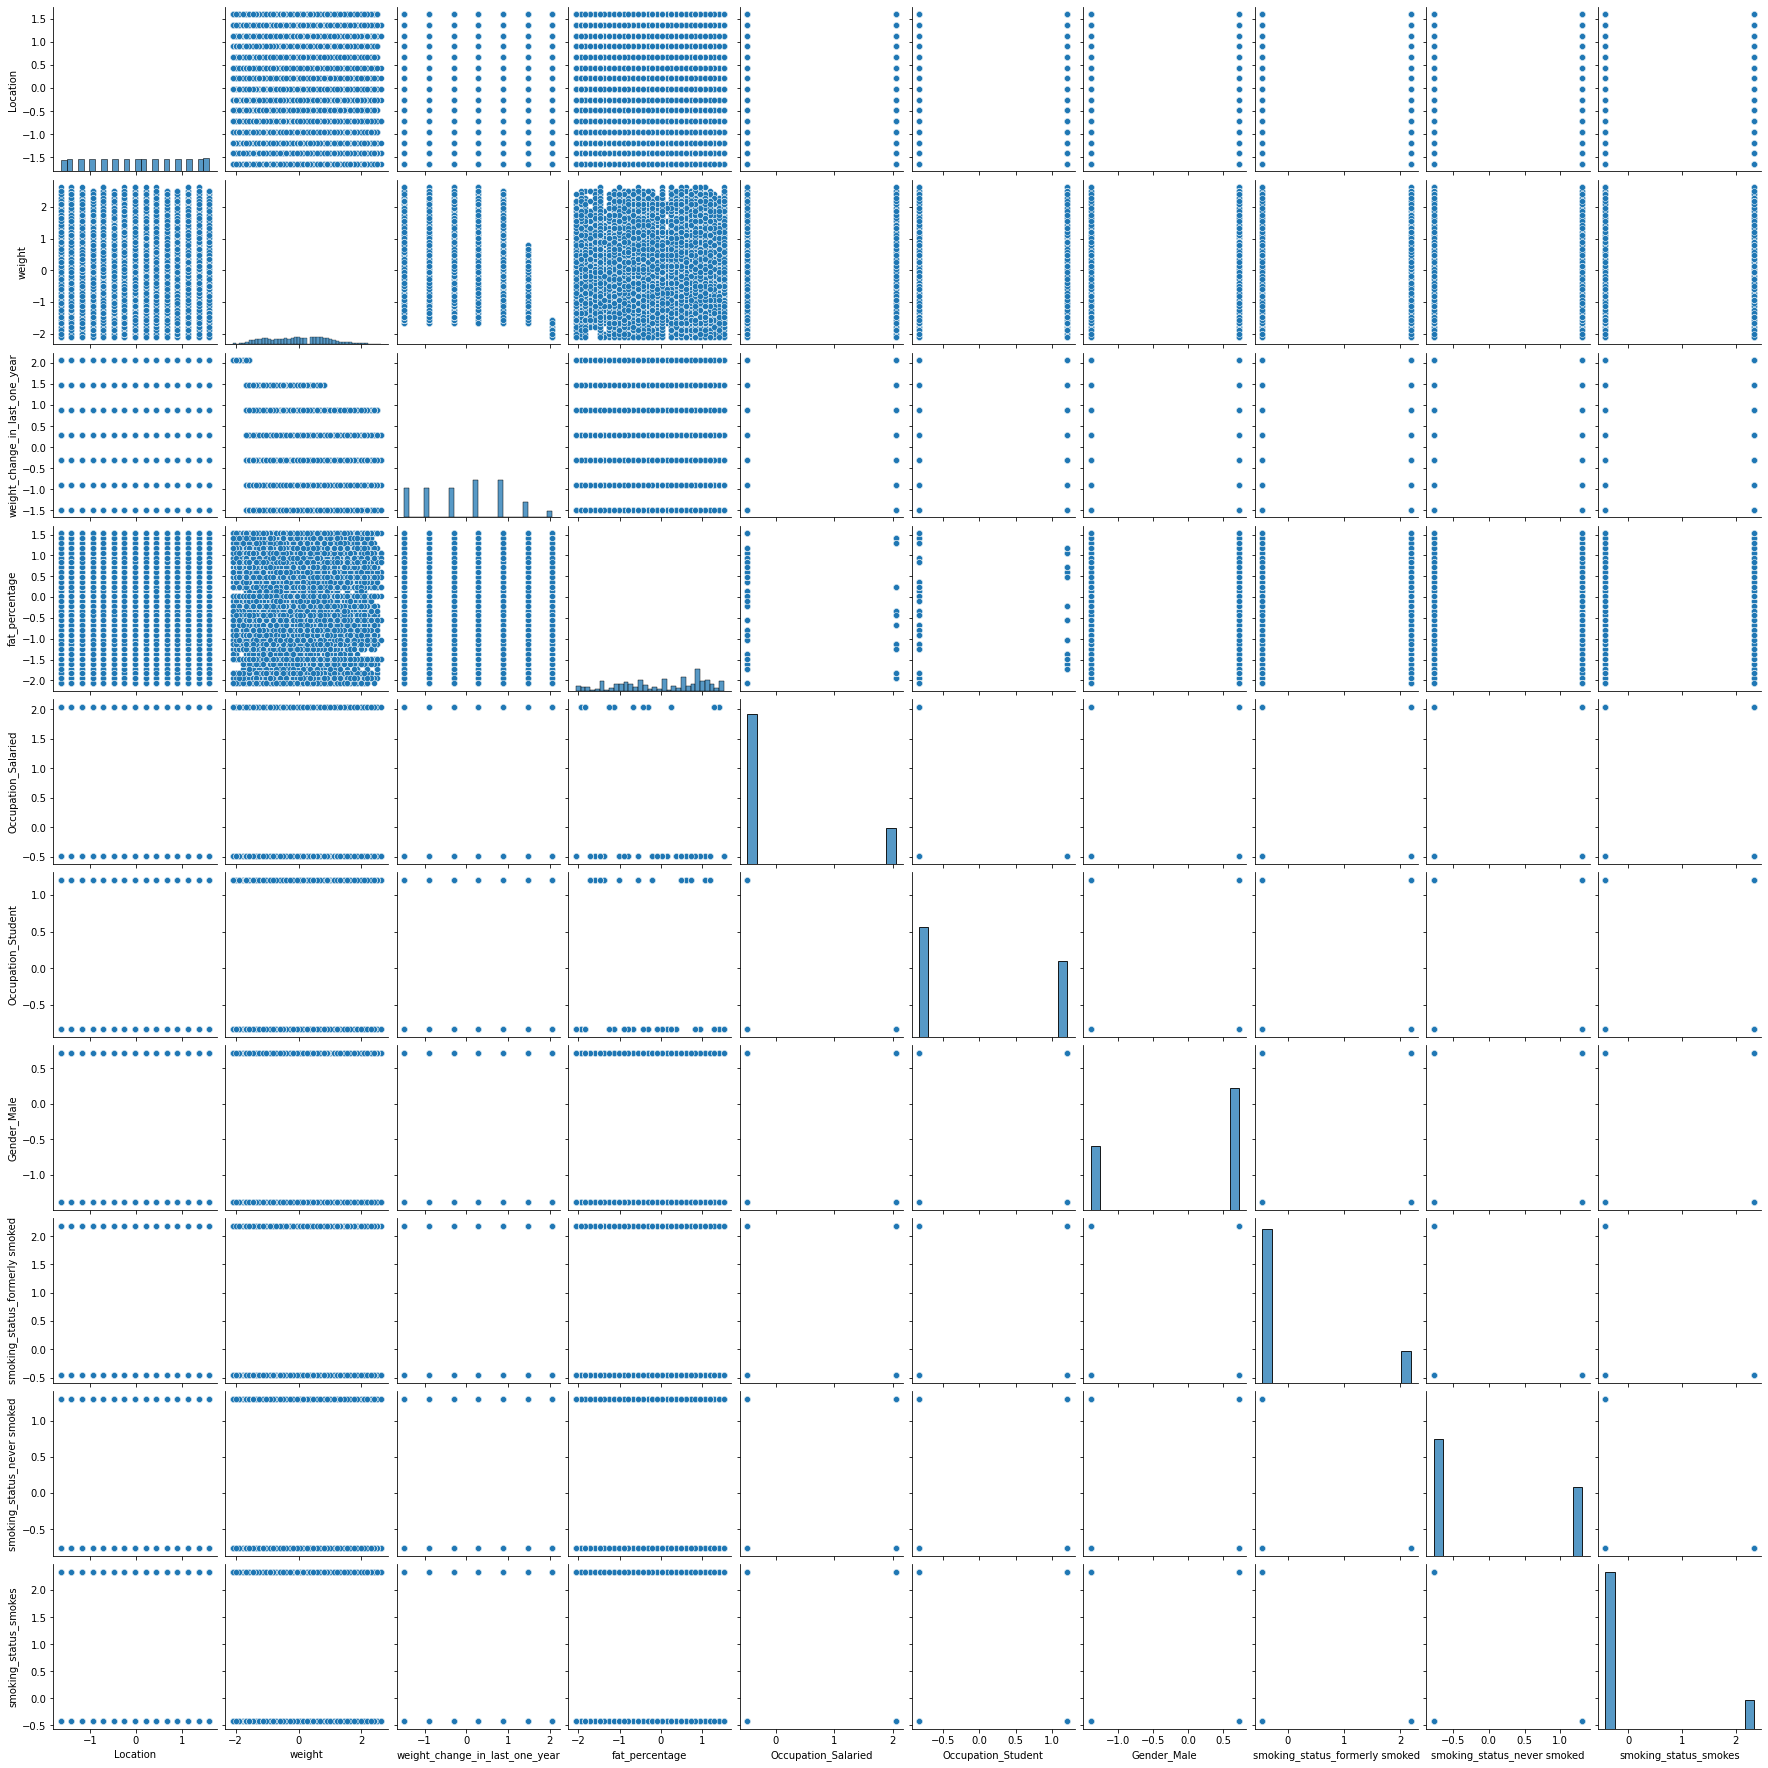

In [72]:
# Ploting the pairplot for columns 11 to 21
plt.figure()
cols_to_plot = df_imputed.columns[11:21].tolist() 
sns.pairplot(df_imputed[cols_to_plot])
plt.show()


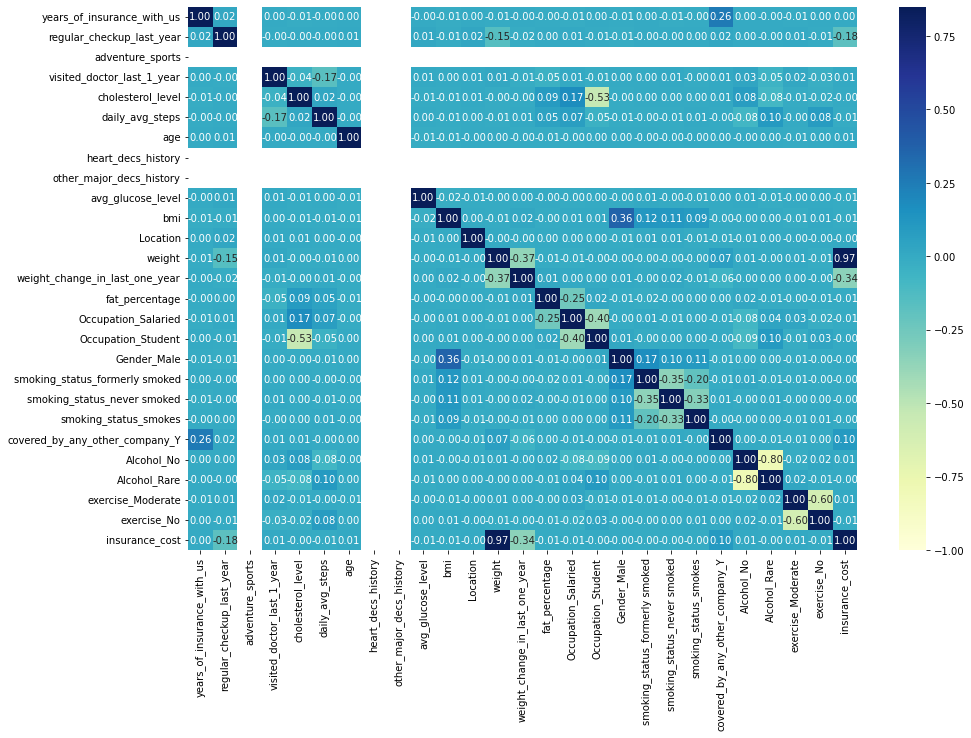

In [73]:
# Plotting the heatmap of correlation , deep blue means high correlation
plt.figure(figsize=(15,10))
sns.heatmap(df_imputed.corr(), annot=True, fmt='.2f', cmap='YlGnBu', vmax =.85, vmin=-1)
plt.show()


In [86]:
#Addition of new variables
#Checking for unbalanced data using unique count
for column in df[['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'Occupation', 'visited_doctor_last_1_year',
       'cholesterol_level', 'daily_avg_steps', 'age', 'heart_decs_history',
       'other_major_decs_history', 'Gender', 'avg_glucose_level', 'bmi',
       'smoking_status', 'Location', 'weight', 'covered_by_any_other_company',
       'Alcohol', 'exercise', 'weight_change_in_last_one_year',
       'fat_percentage', 'insurance_cost'] ]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

YEARS_OF_INSURANCE_WITH_US :  9
2    1808
6    2804
4    2846
1    2856
7    2873
0    2912
5    2941
8    2970
3    2990
Name: years_of_insurance_with_us, dtype: int64


REGULAR_CHECKUP_LAST_YEAR :  6
5      348
4      777
3     1818
2     2198
1     4644
0    15215
Name: regular_checkup_last_year, dtype: int64


ADVENTURE_SPORTS :  2
1     2043
0    22957
Name: adventure_sports, dtype: int64


OCCUPATION :  3
Salaried     4811
Business    10020
Student     10169
Name: Occupation, dtype: int64


VISITED_DOCTOR_LAST_1_YEAR :  12
12       1
0        1
10       6
9       13
8       76
7      189
1      432
6      546
5     1265
4     6708
3     7094
2     8669
Name: visited_doctor_last_1_year, dtype: int64


CHOLESTEROL_LEVEL :  5
5    2054
3    2881
4    2963
1    8339
2    8763
Name: cholesterol_level, dtype: int64


DAILY_AVG_STEPS :  4914
10777     1
8680      1
8800      1
3225      1
6822      1
         ..
5017     21
5124     21
5051     22
4993     23
4870     25
Name: daily_avg

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["insurance_cost"] = df_imputed.columns


In [89]:
vif_data["VIF"] = [variance_inflation_factor(df_imputed.values, i)
                          for i in range(len(df_imputed.columns))]


In [90]:
print(vif_data)

                    insurance_cost   VIF
0       years_of_insurance_with_us  1.07
1        regular_checkup_last_year  1.06
2                 adventure_sports  0.00
3       visited_doctor_last_1_year  1.04
4                cholesterol_level  1.43
5                  daily_avg_steps  1.06
6                              age  1.00
7               heart_decs_history  0.00
8         other_major_decs_history  0.00
9                avg_glucose_level  1.00
10                             bmi  1.19
11                        Location  1.00
12                          weight 18.19
13  weight_change_in_last_one_year  1.17
14                  fat_percentage  1.10
15             Occupation_Salaried  1.32
16              Occupation_Student  1.65
17                     Gender_Male  1.24
18  smoking_status_formerly smoked  1.46
19     smoking_status_never smoked  1.55
20           smoking_status_smokes  1.39
21  covered_by_any_other_company_Y  1.11
22                      Alcohol_No  2.77
23              

In [91]:
vif_data.sort_values(by=['VIF'],ascending=False)


,insurance_cost,VIF
12,weight,18.19
26,insurance_cost,18.11
23,Alcohol_Rare,2.77
22,Alcohol_No,2.77
16,Occupation_Student,1.65
25,exercise_No,1.59
24,exercise_Moderate,1.58
19,smoking_status_never smoked,1.55
18,smoking_status_formerly smoked,1.46
4,cholesterol_level,1.43


In [92]:
#from sklearn.preprocessing import StandardScaler
#X = StandardScaler()
#d1_scaled = X.fit_transform(d1_imputed)
#d1_scaled
#k-means clustering

In [93]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt


In [94]:
k_means = KMeans(n_clusters = 2,random_state=1)


In [95]:
k_means.fit(df_imputed)

KMeans(n_clusters=2, random_state=1)

In [96]:
k_means.inertia_

1632444537855.975

In [97]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_imputed)
k_means.inertia_

787532169194.4719

In [98]:
k_means = KMeans(n_clusters = 4)
k_means.fit(df_imputed)
k_means.inertia_


399964969806.7571

In [99]:
k_means = KMeans(n_clusters = 5)
k_means.fit(df_imputed)
k_means.inertia_

255689123226.77774

In [100]:
k_means = KMeans(n_clusters = 6)
k_means.fit(df_imputed)
k_means.inertia_

180888186983.53134

In [101]:
k_means = KMeans(n_clusters = 7)
k_means.fit(df_imputed)
k_means.inertia_

134988817645.29

In [102]:
k_means = KMeans(n_clusters = 7)
k_means.fit(df_imputed)
k_means.inertia_

133672451227.22128

<AxesSubplot:>

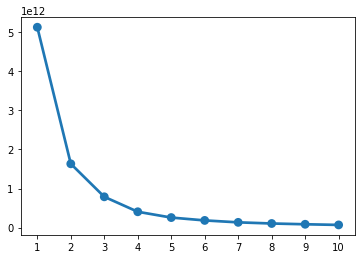

In [103]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df_imputed)
    wss.append(KM.inertia_)
a=[1,2,3,4,5,6,7,8,9,10]
sns.pointplot(a, wss)

In [104]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [107]:
silhouette_score(df_imputed,labels,random_state=1)

0.5791885591497029

In [106]:
#forming 4 clusters in data
k_means = KMeans(n_clusters = 3)
k_means.fit(df_imputed)
labels = k_means.labels_

In [108]:
clus_df= df.copy()

In [109]:
clus_df["clusters"] = labels
clus_df.head().T

,0,1,2,3,4
years_of_insurance_with_us,3,0,1,7,3
regular_checkup_last_year,1,0,0,4,1
adventure_sports,1,0,0,0,0
Occupation,Salaried,Student,Business,Business,Student
visited_doctor_last_1_year,2,4,4,2,2
cholesterol_level,1,2,4,3,2
daily_avg_steps,4866,6411,4509,6214,4938
age,28,50,68,51,44
heart_decs_history,1,0,0,0,0
other_major_decs_history,0,0,0,0,1


In [110]:
clus_df.clusters.value_counts().sort_index()

0    10074
1     3630
2    11296
Name: clusters, dtype: int64

In [111]:
#clust_profile=d1.drop(['applicant_id'],axis=1)
clust_profile=clus_df.copy()
clust_profile=clust_profile.groupby('clusters').mean()
clust_profile['freq']=clus_df.clusters.value_counts().sort_index()
clust_profile

,years_of_insurance_with_us,regular_checkup_last_year,adventure_sports,visited_doctor_last_1_year,daily_avg_steps,age,heart_decs_history,other_major_decs_history,avg_glucose_level,bmi,weight,weight_change_in_last_one_year,fat_percentage,insurance_cost,freq
clusters,,,,,,,,,,,,,,,
0,4.09,0.96,0.06,3.10,5215.85,44.87,0.05,0.10,168.19,31.44,62.44,3.17,28.89,12971.82,10074
1,4.03,0.35,0.10,3.12,5199.78,45.32,0.06,0.10,167.16,31.21,85.89,2.01,28.64,50807.49,3630
2,4.11,0.74,0.10,3.10,5221.10,44.83,0.05,0.10,167.06,31.41,75.20,2.10,28.80,32186.25,11296


In [112]:
clust_profile.T

clusters,0,1,2
years_of_insurance_with_us,4.09,4.03,4.11
regular_checkup_last_year,0.96,0.35,0.74
adventure_sports,0.06,0.10,0.10
visited_doctor_last_1_year,3.10,3.12,3.10
daily_avg_steps,5215.85,5199.78,5221.10
age,44.87,45.32,44.83
heart_decs_history,0.05,0.06,0.05
other_major_decs_history,0.10,0.10,0.10
avg_glucose_level,168.19,167.16,167.06
bmi,31.44,31.21,31.41


In [113]:
#1). Model building and interpretation
#Splitting data into train and test
#df-           -       initial dataset
#df_new-       -       encoded dataset
#predictors    -       df_new without insurance_cost 
#response      -       df_new with only insurance_cost
#df1            =      df_new(concatenation of predictors and response)
#df_imputed    -       scaled and imputed new dataset of df1/df_new

In [114]:
df_imputed.columns

Index(['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'cholesterol_level',
       'daily_avg_steps', 'age', 'heart_decs_history',
       'other_major_decs_history', 'avg_glucose_level', 'bmi', 'Location',
       'weight', 'weight_change_in_last_one_year', 'fat_percentage',
       'Occupation_Salaried', 'Occupation_Student', 'Gender_Male',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'covered_by_any_other_company_Y', 'Alcohol_No',
       'Alcohol_Rare', 'exercise_Moderate', 'exercise_No', 'insurance_cost'],
      dtype='object')

In [ ]:
#df_new=pd.DataFrame(scaler.inverse_transform(df_imputed),columns=df_imputed.columns)
#df_new

In [115]:
# Copy all the predictor variables into X dataframe
X = df_imputed.drop('insurance_cost', axis=1)

In [116]:
# Copy target into the y dataframe.  
y = df_imputed['insurance_cost']

In [118]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [119]:
#a. Build various models (You can choose to build models for either or all of descriptive, predictive or prescriptive purposes)
#a.Linear Regression

In [120]:
# invoke the LinearRegression function and find the bestfit model on training data

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#,mean_absolute_percentage_error
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [122]:
regression_model.coef_

array([-3.41084563e+01, -7.47533681e+02, -1.81898940e-12, -3.98162063e+01,
        3.45176453e+01, -3.29560644e+01,  4.50235509e+01,  1.36424205e-12,
       -1.81898940e-12,  2.26769154e+01, -2.16714642e+00, -5.69642200e+00,
        1.38896175e+04,  2.90479767e+02, -3.03178012e+00,  3.73355007e+01,
        4.00538237e+01,  2.54932326e+01, -1.67051301e+01,  9.44873041e+00,
       -1.58897583e+01,  5.55808565e+02, -1.10979897e+01, -1.30718530e+00,
        7.02633538e+00,  2.72766688e+00])

In [ ]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))


In [ ]:
# Let us explore the coefficients for each of the independent attributes

#for idx, col_name in enumerate(X_train.columns):
#   print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

In [123]:
regression_model.intercept_

27005.87530413304

In [124]:
# Let us check the intercept for the model

#intercept = regression_model.intercept_[0]

#print("The intercept for our model is {}".format(intercept))

print("The intercept for our model is {}".format(regression_model.intercept_))

The intercept for our model is 27005.87530413304


In [125]:
# R square on training data
r_sqr=regression_model.score(X_train, y_train)
print("R square on training data is",r_sqr)

R square on training data is 0.9446885531208044


In [ ]:
#94% of the variation in the insurance_cost is explained by the predictors in the model for train set

In [ ]:
#Root Mean Squared Error - RMSE
#print("Root Mean Squared Error - RMSE:",np.sqrt(mse))

In [ ]:
#LR_MAPE= MAPE(y_test,ytest_predict)
#print("MAPE:",LR_MAPE)

In [ ]:
#from sklearn.metrics import mean_absolute_percentage_error
#mape=mean_absolute_percentage_error(y_test, ytest_predict)
#print("MAPE:",mape)

In [126]:
# R square on training data
r_sqr=regression_model.score(X_train, y_train)
print("R square on training data is",r_sqr)
# R square on testing data
r_sqr=regression_model.score(X_test, y_test)
print("R square on testing data is",r_sqr)



# adjusted R-squared on training data
adjr =1 - ( 1-regression_model.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y) - X_train.shape[1] - 1 )
print("Adj R-squared of the train data set is",adjr)
# adjusted R-squared
adjr =1 - ( 1-regression_model.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y) - X_test.shape[1] - 1 )
print("Adj R-squared of the test data set is",adjr)
# adjusted R-squared on entire data
adjr =1 - ( 1-regression_model.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print("Adj R-squared of the entire given dataset is",adjr)

#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
rmse=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print("RMSE on training data is",rmse)
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
rmse=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("RMSE on testing data is",rmse)



#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#MAPE on Training data
ytrain_predict = regression_model.predict(X_train) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the train data is ",MAPE(y_train,ytrain_predict))

#Defining MAPE function
#def MAPE(Y_actual,Y_Predicted):
 #   mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
 #   return mape

#MAPE on Testing data
ytest_predict = regression_model.predict(X_test) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the test data is ",MAPE(y_test,ytest_predict))

R square on training data is 0.9446885531208044
R square on testing data is 0.9449027282777696
Adj R-squared of the train data set is 0.9612423413711191
Adj R-squared of the test data set is 0.9834551539404555
Adj R-squared of the entire given dataset is 0.9446949726649996
RMSE on training data is 3379.4296627114077
RMSE on testing data is 3336.7619275116313
MAPE on the train data is  15.351883993474177
MAPE on the test data is  15.098329848623429


In [127]:
#Model score and Deduction for each Model in a DataFrame
LR1_trscore=r2_score(y_train,predicted_train)
LR1_trRMSE=np.sqrt(mean_squared_error(y_train,predicted_train))
LR1_trMSE=mean_squared_error(y_train,predicted_train)
LR1_trMAE=mean_absolute_error(y_train,predicted_train)
LR1_trainMAPE=sklearn.metrics.mean_absolute_percentage_error(y_train, ytrain_predict)
#LR1_trMAPE=MAPE(y_train,ytrain_predict)
#LR1_tradjrsq=adjr

LR1_vlscore=r2_score(y_test,predicted_test)
LR1_vlRMSE=np.sqrt(mean_squared_error(y_test,predicted_test))
LR1_vlMSE=mean_squared_error(y_test,predicted_test)
LR1_vlMAE=mean_absolute_error(y_test,predicted_test)
LR1_testMAPE=sklearn.metrics.mean_absolute_percentage_error(y_test, ytest_predict)
#LR1_trMAPE=MAPE(y_test,ytest_predict)
#LR1_tradjrsq=adjr

metrics_df=pd.DataFrame({'Method':['Linear Reg Model1'],'Test Score':LR1_vlscore,'RMSE_test': LR1_vlRMSE, 'MSE_test': LR1_vlMSE, 'MAE_test': LR1_vlMAE,'MAPE_test':LR1_testMAPE,'Train Score':LR1_trscore,'RMSE_train': LR1_trRMSE, 'MSE_train': LR1_trMSE, 'MAE_train': LR1_trMAE,'MAPE_train':LR1_trainMAPE})


metrics_df.T

,0
Method,Linear Reg Model1
Test Score,0.94
RMSE_test,3336.76
MSE_test,11133980.16
MAE_test,2709.81
MAPE_test,0.15
Train Score,0.94
RMSE_train,3379.43
MSE_train,11420544.85
MAE_train,2723.06


In [128]:
#Linear regression using Stats model
#Stats model is done by concatenating both the X and y datasets
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,years_of_insurance_with_us,regular_checkup_last_year,adventure_sports,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,avg_glucose_level,bmi,Location,weight,weight_change_in_last_one_year,fat_percentage,Occupation_Salaried,Occupation_Student,Gender_Male,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,covered_by_any_other_company_Y,Alcohol_No,Alcohol_Rare,exercise_Moderate,exercise_No,insurance_cost
4289,-1.57,1.02,-0.30,0.78,2.00,0.03,0.01,-0.24,-0.33,-0.60,0.51,-1.18,0.26,-0.90,-0.56,-0.49,1.21,0.72,-0.46,-0.77,2.34,-0.66,-0.72,0.90,0.84,-0.51,28382.00
19621,0.73,1.02,-0.30,-0.09,5.00,2.18,0.94,-0.24,-0.33,1.33,-0.04,1.14,-0.49,0.29,1.30,2.05,-0.83,0.72,-0.46,-0.77,-0.43,1.52,-0.72,0.90,0.84,-0.51,23446.00
14965,0.73,-0.65,-0.30,0.78,2.00,0.58,-0.24,-0.24,-0.33,-1.60,-0.54,-1.41,1.22,0.88,-0.91,-0.49,-0.83,0.72,-0.46,-0.77,2.34,-0.66,-0.72,0.90,0.84,-0.51,46892.00
12321,0.73,0.19,-0.30,-0.09,1.00,-0.71,0.63,-0.24,-0.33,1.52,0.17,-0.95,1.33,0.88,-1.95,2.05,-0.83,0.72,2.19,-0.77,-0.43,-0.66,1.39,-1.11,0.84,-0.51,40722.00
6269,-0.03,1.44,-0.30,-0.09,2.00,2.18,-1.24,-0.24,-0.33,-0.33,0.83,-1.64,0.79,-1.49,0.83,-0.49,-0.83,0.72,-0.46,1.30,-0.43,-0.66,-0.72,0.90,0.84,-0.51,32084.00


In [129]:
data_train.shape

(17500, 27)

In [130]:
data_train.rename(columns={"smoking_status_formerly smoked": "smoking_status_formerly_smoked","smoking_status_never smoked":"smoking_status_never_smoked"}, inplace=True)

In [131]:
data_train.columns

Index(['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'cholesterol_level',
       'daily_avg_steps', 'age', 'heart_decs_history',
       'other_major_decs_history', 'avg_glucose_level', 'bmi', 'Location',
       'weight', 'weight_change_in_last_one_year', 'fat_percentage',
       'Occupation_Salaried', 'Occupation_Student', 'Gender_Male',
       'smoking_status_formerly_smoked', 'smoking_status_never_smoked',
       'smoking_status_smokes', 'covered_by_any_other_company_Y', 'Alcohol_No',
       'Alcohol_Rare', 'exercise_Moderate', 'exercise_No', 'insurance_cost'],
      dtype='object')

In [132]:
data_test.rename(columns={"smoking_status_formerly smoked": "smoking_status_formerly_smoked","smoking_status_never smoked":"smoking_status_never_smoked"}, inplace=True)

In [133]:
data_test.columns

Index(['years_of_insurance_with_us', 'regular_checkup_last_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'cholesterol_level',
       'daily_avg_steps', 'age', 'heart_decs_history',
       'other_major_decs_history', 'avg_glucose_level', 'bmi', 'Location',
       'weight', 'weight_change_in_last_one_year', 'fat_percentage',
       'Occupation_Salaried', 'Occupation_Student', 'Gender_Male',
       'smoking_status_formerly_smoked', 'smoking_status_never_smoked',
       'smoking_status_smokes', 'covered_by_any_other_company_Y', 'Alcohol_No',
       'Alcohol_Rare', 'exercise_Moderate', 'exercise_No', 'insurance_cost'],
      dtype='object')

In [134]:
#first iteration
expr= 'insurance_cost ~ years_of_insurance_with_us + regular_checkup_last_year + adventure_sports+visited_doctor_last_1_year +cholesterol_level + daily_avg_steps + age + heart_decs_history  + other_major_decs_history + avg_glucose_level + bmi+Location+weight+weight_change_in_last_one_year+fat_percentage+Occupation_Salaried+Occupation_Student+Gender_Male+smoking_status_formerly_smoked+smoking_status_never_smoked+smoking_status_smokes+covered_by_any_other_company_Y+Alcohol_No+Alcohol_Rare+exercise_Moderate+exercise_No '

In [135]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept                        21507.75
years_of_insurance_with_us         -34.11
regular_checkup_last_year         -747.53
adventure_sports                 -6416.11
visited_doctor_last_1_year         -39.82
cholesterol_level                   34.52
daily_avg_steps                    -32.96
age                                 45.02
heart_decs_history               -5170.73
other_major_decs_history         -7095.74
avg_glucose_level                   22.68
bmi                                 -2.17
Location                            -5.70
weight                           13889.62
weight_change_in_last_one_year     290.48
fat_percentage                      -3.03
Occupation_Salaried                 37.34
Occupation_Student                  40.05
Gender_Male                         25.49
smoking_status_formerly_smoked     -16.71
smoking_status_never_smoked          9.45
smoking_status_smokes              -15.89
covered_by_any_other_company_Y     555.81
Alcohol_No                        

In [136]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.298e+04
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:46:39   Log-Likelihood:            -1.6703e+05
No. Observations:               17500   AIC:                         3.341e+05
Df Residuals:                   17476   BIC:                         3.343e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [137]:
# Calculate MSE
mse1 = np.mean((lm1.predict(data_train.drop('insurance_cost',axis=1))-data_train['insurance_cost'])**2)

#Root Mean Squared Error - RMSE
print('RMSE on train data:',np.sqrt(mse1))

# Calculate MSE
mse2 = np.mean((lm1.predict(data_test.drop('insurance_cost',axis=1))-data_test['insurance_cost'])**2)

#Root Mean Squared Error - RMSE
print('RMSE on test data:',np.sqrt(mse2))

RMSE on train data: 3379.4296627114077
RMSE on test data: 3336.761927511635


In [138]:
# Calculate MSE
mse1 = np.mean((lm1.predict(data_train.drop('insurance_cost',axis=1))-data_train['insurance_cost'])**2)

#Root Mean Squared Error - RMSE
print('RMSE on train data:',np.sqrt(mse1))

RMSE on train data: 3379.4296627114077


In [139]:
# Calculate MSE
mse2 = np.mean((lm1.predict(data_test.drop('insurance_cost',axis=1))-data_test['insurance_cost'])**2)

#Root Mean Squared Error - RMSE
print('RMSE on test data:',np.sqrt(mse2))

RMSE on test data: 3336.761927511635


In [140]:
np.sqrt(lm1.mse_resid) #another way

3381.7493721684373

In [141]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

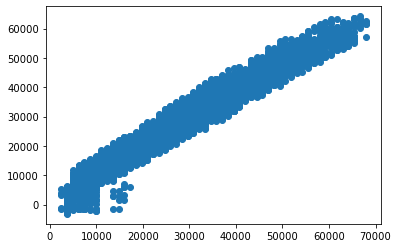

In [142]:
plt.scatter(data_test['insurance_cost'], y_pred)
plt.show()

In [143]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(21507.75) * Intercept + (-34.11) * years_of_insurance_with_us + (-747.53) * regular_checkup_last_year + (-6416.11) * adventure_sports + (-39.82) * visited_doctor_last_1_year + (34.52) * cholesterol_level + (-32.96) * daily_avg_steps + (45.02) * age + (-5170.73) * heart_decs_history + (-7095.74) * other_major_decs_history + (22.68) * avg_glucose_level + (-2.17) * bmi + (-5.7) * Location + (13889.62) * weight + (290.48) * weight_change_in_last_one_year + (-3.03) * fat_percentage + (37.34) * Occupation_Salaried + (40.05) * Occupation_Student + (25.49) * Gender_Male + (-16.71) * smoking_status_formerly_smoked + (9.45) * smoking_status_never_smoked + (-15.89) * smoking_status_smokes + (555.81) * covered_by_any_other_company_Y + (-11.1) * Alcohol_No + (-1.31) * Alcohol_Rare + (7.03) * exercise_Moderate + (2.73) * exercise_No + 

In [ ]:
#VARIABLE INFLATION FACTOR

In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [145]:
vif = [variance_inflation_factor(df_imputed.values, ix) for ix in range(X.shape[1])] 

In [146]:
i=0
for column in df_imputed.columns:
    if i < 25:
        print (column ,"--->",  vif[i])
        i = i+1

years_of_insurance_with_us ---> 1.0748911233911567
regular_checkup_last_year ---> 1.057005487000222
adventure_sports ---> 2.659547154252902e-06
visited_doctor_last_1_year ---> 1.0357774925047312
cholesterol_level ---> 1.428772833768865
daily_avg_steps ---> 1.0600478382148295
age ---> 1.0008722640476242
heart_decs_history ---> 4.272869794922344e-07
other_major_decs_history ---> 0.00018640659854305793
avg_glucose_level ---> 1.0010886661206728
bmi ---> 1.1947584062014032
Location ---> 1.0015319417680628
weight ---> 18.191880295162576
weight_change_in_last_one_year ---> 1.1745297422132703
fat_percentage ---> 1.0997002234239621
Occupation_Salaried ---> 1.319604875077219
Occupation_Student ---> 1.653540178885356
Gender_Male ---> 1.2391181687586825
smoking_status_formerly smoked ---> 1.4584619017785723
smoking_status_never smoked ---> 1.5538192256373882
smoking_status_smokes ---> 1.391356228838762
covered_by_any_other_company_Y ---> 1.1083753674662435
Alcohol_No ---> 2.765344823954657
Alcohol

In [147]:
#Regularization
#Lasso Regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
Lasso1 = Lasso(alpha=1)
Lasso1.fit(X_train, y_train)

Lasso(alpha=1)

In [148]:
yLasso1_predtrain= Lasso1.predict(X_train)
yLasso1_predtest= Lasso1.predict(X_test)

Lasso1.coef_

array([-3.28076521e+01, -7.46138286e+02, -0.00000000e+00, -3.86004531e+01,
        3.28666951e+01, -3.12714888e+01,  4.39958014e+01,  0.00000000e+00,
        0.00000000e+00,  2.16417633e+01, -5.01768472e-01, -4.77025725e+00,
        1.38882348e+04,  2.88897255e+02, -2.22676398e+00,  3.58182308e+01,
        3.75265262e+01,  2.35673557e+01, -1.52485076e+01,  9.52217875e+00,
       -1.45550554e+01,  5.54434559e+02, -9.16311552e+00,  0.00000000e+00,
        4.40688881e+00,  1.15301718e-02])

In [149]:
# R square on training data
r_sqr=Lasso1.score(X_train, y_train)
print("R square on training data is",r_sqr)
# R square on testing data
r_sqr=Lasso1.score(X_test, y_test)
print("R square on testing data is",r_sqr)



# adjusted R-squared on training data
adjr =1 - ( 1-Lasso1.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y) - X_train.shape[1] - 1 )
print("Adj R-squared of the train data set is",adjr)
# adjusted R-squared
adjr =1 - ( 1-Lasso1.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y) - X_test.shape[1] - 1 )
print("Adj R-squared of the test data set is",adjr)
# adjusted R-squared on entire data
adjr =1 - ( 1-Lasso1.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print("Adj R-squared of the entire given dataset is",adjr)

#RMSE on Training data
predicted_train=Lasso1.fit(X_train, y_train).predict(X_train)
rmse=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print("RMSE on training data is",rmse)
#RMSE on Testing data
predicted_test=Lasso1.fit(X_train, y_train).predict(X_test)
rmse=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("RMSE on testing data is",rmse)



#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#MAPE on Training data
ytrain_predict = Lasso1.predict(X_train) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the train data is ",MAPE(y_train,ytrain_predict))

#Defining MAPE function
#def MAPE(Y_actual,Y_Predicted):
 #   mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
 #   return mape

#MAPE on Testing data
ytest_predict = Lasso1.predict(X_test) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the test data is ",MAPE(y_test,ytest_predict))

R square on training data is 0.9446883943668088
R square on testing data is 0.9449067063162204
Adj R-squared of the train data set is 0.9612422301295314
Adj R-squared of the test data set is 0.9834563484829751
Adj R-squared of the entire given dataset is 0.9446960374186542
RMSE on training data is 3379.4345124993542
RMSE on testing data is 3336.641467764397
MAPE on the train data is  15.351628419756302
MAPE on the test data is  15.097047078642966


In [150]:
Lasso1_trainscore=r2_score(y_train,yLasso1_predtrain)
Lasso1_trainRMSE=np.sqrt(mean_squared_error(y_train, yLasso1_predtrain))
Lasso1_trainMSE=mean_squared_error(y_train, yLasso1_predtrain)
Lasso1_trainMAE=mean_absolute_error(y_train, yLasso1_predtrain)
Lasso1_trainMAPE=sklearn.metrics.mean_absolute_percentage_error(y_train, ytrain_predict)

Lasso1_testscore=r2_score(y_test,yLasso1_predtest)
Lasso1_testRMSE=np.sqrt(mean_squared_error(y_test, yLasso1_predtest))
Lasso1_testMSE=mean_squared_error(y_test, yLasso1_predtest)
Lasso1_testMAE=mean_absolute_error(y_test, yLasso1_predtest)
Lasso1_testMAPE=sklearn.metrics.mean_absolute_percentage_error(y_test, ytest_predict)

Lasso1_df=pd.DataFrame({'Method':['Linear-Reg Lasso1'],'Test Score':Lasso1_testscore,'RMSE_test': Lasso1_testRMSE, 'MSE_test': Lasso1_testMSE, 'MAE_test': Lasso1_testMAE,'MAPE_test':Lasso1_testMAPE,'Train Score':Lasso1_trainscore,'RMSE_train': Lasso1_trainRMSE, 'MSE_train': Lasso1_trainMSE, 'MAE_train': Lasso1_trainMAE,'MAPE_train':Lasso1_trainMAPE})
metrics_df = pd.concat([metrics_df, Lasso1_df])

metrics_df

,Method,Test Score,RMSE_test,MSE_test,MAE_test,MAPE_test,Train Score,RMSE_train,MSE_train,MAE_train,MAPE_train
0,Linear Reg Model1,0.94,3336.76,11133980.16,2709.81,0.15,0.94,3379.43,11420544.85,2723.06,0.15
0,Linear-Reg Lasso1,0.94,3336.64,11133176.28,2709.65,0.15,0.94,3379.43,11420577.62,2723.06,0.15


In [151]:
#Ridge Regression
Ridge1 = Ridge(alpha=0.5)
Ridge1.fit(X_train, y_train)

Ridge(alpha=0.5)

In [152]:
Ridge(alpha=0.5)
#predicting result over test data
yRidge1_predtrain= Ridge1.predict(X_train)
yRidge1_predtest= Ridge1.predict(X_test)

Ridge1.coef_

array([-3.41138229e+01, -7.47588015e+02,  3.88180343e-24, -3.98092701e+01,
        3.45143904e+01, -3.29539622e+01,  4.50198742e+01,  6.27346011e-24,
        0.00000000e+00,  2.26732457e+01, -2.16629395e+00, -5.69322955e+00,
        1.38891467e+04,  2.90294870e+02, -3.03473506e+00,  3.73258216e+01,
        4.00476299e+01,  2.54935583e+01, -1.67069354e+01,  9.44690923e+00,
       -1.58921023e+01,  5.55816877e+02, -1.10939514e+01, -1.30248944e+00,
        7.02739673e+00,  2.72120273e+00])

In [153]:
# R square on training data
r_sqr=Ridge1.score(X_train, y_train)
print("R square on training data is",r_sqr)
# R square on testing data
r_sqr=Ridge1.score(X_test, y_test)
print("R square on testing data is",r_sqr)



# adjusted R-squared on training data
adjr =1 - ( 1-Ridge1.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y) - X_train.shape[1] - 1 )
print("Adj R-squared of the train data set is",adjr)
# adjusted R-squared
adjr =1 - ( 1-Ridge1.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y) - X_test.shape[1] - 1 )
print("Adj R-squared of the test data set is",adjr)
# adjusted R-squared on entire data
adjr =1 - ( 1-Ridge1.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print("Adj R-squared of the entire given dataset is",adjr)

#RMSE on Training data
predicted_train=Ridge1.fit(X_train, y_train).predict(X_train)
rmse=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print("RMSE on training data is",rmse)
#RMSE on Testing data
predicted_test=Ridge1.fit(X_train, y_train).predict(X_test)
rmse=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("RMSE on testing data is",rmse)



#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#MAPE on Training data
ytrain_predict = Ridge1.predict(X_train) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the train data is ",MAPE(y_train,ytrain_predict))

#Defining MAPE function
#def MAPE(Y_actual,Y_Predicted):
 #   mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
 #   return mape

#MAPE on Testing data
ytest_predict = Ridge1.predict(X_test) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the test data is ",MAPE(y_test,ytest_predict))


R square on training data is 0.9446885522145789
R square on testing data is 0.9449029323657311
Adj R-squared of the train data set is 0.9612423407361117
Adj R-squared of the test data set is 0.9834552152248676
Adj R-squared of the entire given dataset is 0.944695032395511
RMSE on training data is 3379.429690395778
RMSE on testing data is 3336.7557475906556
MAPE on the train data is  15.351710945880232
MAPE on the test data is  15.098138580348323


In [154]:
Ridge1_trainscore=r2_score(y_train,yRidge1_predtrain)
Ridge1_trainRMSE=np.sqrt(mean_squared_error(y_train, yRidge1_predtrain))
Ridge1_trainMSE=mean_squared_error(y_train, yRidge1_predtrain)
Ridge1_trainMAE=mean_absolute_error(y_train, yRidge1_predtrain)
Ridge1_trainMAPE=sklearn.metrics.mean_absolute_percentage_error(y_train, ytrain_predict)

Ridge1_testscore=r2_score(y_test,yRidge1_predtest)
Ridge1_testRMSE=np.sqrt(mean_squared_error(y_test, yRidge1_predtest))
Ridge1_testMSE=mean_squared_error(y_test, yRidge1_predtest)
Ridge1_testMAE=mean_absolute_error(y_test, yRidge1_predtest)
Ridge1_testMAPE=sklearn.metrics.mean_absolute_percentage_error(y_test, ytest_predict)

Ridge1_df=pd.DataFrame({'Method':['Linear-Reg Ridge1'],'Test Score':Ridge1_testscore,'RMSE_test': Ridge1_testRMSE, 'MSE_test': Ridge1_testMSE, 'MAE_test': Ridge1_testMAE,'MAPE_test':Ridge1_testMAPE,'Train Score':Ridge1_trainscore,'RMSE_train': Ridge1_trainRMSE, 'MSE_train': Ridge1_trainMSE, 'MAE_train': Ridge1_trainMAE,'MAPE_train':Ridge1_trainMAPE})
metrics_df = pd.concat([metrics_df, Ridge1_df])

metrics_df


,Method,Test Score,RMSE_test,MSE_test,MAE_test,MAPE_test,Train Score,RMSE_train,MSE_train,MAE_train,MAPE_train
0,Linear Reg Model1,0.94,3336.76,11133980.16,2709.81,0.15,0.94,3379.43,11420544.85,2723.06,0.15
0,Linear-Reg Lasso1,0.94,3336.64,11133176.28,2709.65,0.15,0.94,3379.43,11420577.62,2723.06,0.15
0,Linear-Reg Ridge1,0.94,3336.76,11133938.92,2709.79,0.15,0.94,3379.43,11420545.03,2723.05,0.15


In [155]:
#b.Random Forest Regressor
#1. BASE MODEL
from sklearn.ensemble import RandomForestRegressor
rfcl=RandomForestRegressor(n_estimators = 50,random_state=0)

In [156]:
rfcl = rfcl.fit(X_train, y_train)

In [157]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

In [158]:
from sklearn.metrics import r2_score

In [159]:
print("R square on training data is",r2_score(y_train,ytrain_predict))

R square on training data is 0.9931040918973013


In [160]:
print("R square on testing data is",r2_score(y_test,ytest_predict))

R square on testing data is 0.9510424569581692


In [161]:
# R square on training data
r_sqr=rfcl.score(X_train, y_train)
print("R square on training data is",r_sqr)
# R square on testing data
r_sqr=rfcl.score(X_test, y_test)
print("R square on testing data is",r_sqr)



# adjusted R-squared on training data
adjr =1 - ( 1-rfcl.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y) - X_train.shape[1] - 1 )
print("Adj R-squared of the train data set is",adjr)
# adjusted R-squared
adjr =1 - ( 1-rfcl.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y) - X_test.shape[1] - 1 )
print("Adj R-squared of the test data set is",adjr)
# adjusted R-squared on entire data
adjr =1 - ( 1-rfcl.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print("Adj R-squared of the entire given dataset is",adjr)

#RMSE on Training data
predicted_train=rfcl.fit(X_train, y_train).predict(X_train)
rmse=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print("RMSE on training data is",rmse)
#RMSE on Testing data
predicted_test=rfcl.fit(X_train, y_train).predict(X_test)
rmse=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("RMSE on testing data is",rmse)



#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#MAPE on Training data
ytrain_predict = rfcl.predict(X_train) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the train data is ",MAPE(y_train,ytrain_predict))

#Defining MAPE function
#def MAPE(Y_actual,Y_Predicted):
 #   mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
 #   return mape

#MAPE on Testing data
ytest_predict = rfcl.predict(X_test) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the test data is ",MAPE(y_test,ytest_predict))


R square on training data is 0.9931040918973013
R square on testing data is 0.9510424569581692
Adj R-squared of the train data set is 0.9951679215196763
Adj R-squared of the test data set is 0.9852988181127342
Adj R-squared of the entire given dataset is 0.9806550822299901
RMSE on training data is 1193.250526822164
RMSE on testing data is 3145.3572634690304
MAPE on the train data is  4.605284527360889
MAPE on the test data is  12.397636670527852


In [162]:
#Model score and Deduction for each Model in a DataFrame
RF1_trainscore=r2_score(y_train,ytrain_predict)
RF1_trainRMSE=np.sqrt(mean_squared_error(y_train,ytrain_predict))
RF1_trainMSE=mean_squared_error(y_train,ytrain_predict)
RF1_trainMAE=mean_absolute_error(y_train,ytrain_predict)
RF1_trainMAPE=sklearn.metrics.mean_absolute_percentage_error(y_train, ytrain_predict)

RF1_testscore=r2_score(y_test,ytest_predict)
RF1_testRMSE=np.sqrt(mean_squared_error(y_test,ytest_predict))
RF1_testMSE=mean_squared_error(y_test,ytest_predict)
RF1_testMAE=mean_absolute_error(y_test,ytest_predict)
RF1_testMAPE=sklearn.metrics.mean_absolute_percentage_error(y_test, ytest_predict)

RF1_df=pd.DataFrame({'Method':['RF1 before Grid Search'],'Test Score':RF1_testscore,'RMSE_test': RF1_testRMSE, 'MSE_test':RF1_testMSE, 'MAE_test': RF1_testMAE,'MAPE_test':RF1_testMAPE,'Train Score':RF1_trainscore,'RMSE_train': RF1_trainRMSE, 'MSE_train': RF1_trainMSE, 'MAE_train': RF1_trainMAE,'MAPE_train':RF1_trainMAPE})
metrics_df = pd.concat([metrics_df, RF1_df])
metrics_df

,Method,Test Score,RMSE_test,MSE_test,MAE_test,MAPE_test,Train Score,RMSE_train,MSE_train,MAE_train,MAPE_train
0,Linear Reg Model1,0.94,3336.76,11133980.16,2709.81,0.15,0.94,3379.43,11420544.85,2723.06,0.15
0,Linear-Reg Lasso1,0.94,3336.64,11133176.28,2709.65,0.15,0.94,3379.43,11420577.62,2723.06,0.15
0,Linear-Reg Ridge1,0.94,3336.76,11133938.92,2709.79,0.15,0.94,3379.43,11420545.03,2723.05,0.15
0,RF1 before Grid Search,0.95,3145.36,9893272.31,2517.60,0.12,0.99,1193.25,1423846.82,936.84,0.05


In [163]:
#2.Grid search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [10,50]
}

rfcl = RandomForestRegressor(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)


In [164]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [10, 50]})

In [165]:
best_grid = grid_search.best_estimator_

In [166]:
best_grid

RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=5,
                      min_samples_split=50, n_estimators=50, random_state=0)

In [167]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [168]:
print("Model score on train data is",r2_score(y_train,ytrain_predict))

Model score on train data is 0.927880460962985


In [169]:
print("Model score on test data is",r2_score(y_test,ytest_predict))

Model score on test data is 0.9192791404954773


In [170]:
#3.DATAFRAME CREATION
#Model score and Deduction for each Model in a DataFrame
RF1_trainscore=r2_score(y_train,ytrain_predict)
RF1_trainRMSE=np.sqrt(mean_squared_error(y_train,ytrain_predict))
RF1_trainMSE=mean_squared_error(y_train,ytrain_predict)
RF1_trainMAE=mean_absolute_error(y_train,ytrain_predict)
RF1_trainMAPE=sklearn.metrics.mean_absolute_percentage_error(y_train, ytrain_predict)

RF1_testscore=r2_score(y_test,ytest_predict)
RF1_testRMSE=np.sqrt(mean_squared_error(y_test,ytest_predict))
RF1_testMSE=mean_squared_error(y_test,ytest_predict)
RF1_testMAE=mean_absolute_error(y_test,ytest_predict)
RF1_trainMAPE=sklearn.metrics.mean_absolute_percentage_error(y_test, ytest_predict)

RF1_df=pd.DataFrame({'Method':['RF1 after Grid Search'],'Test Score':RF1_testscore,'RMSE_test': RF1_testRMSE, 'MSE_test':RF1_testMSE, 'MAE_test': RF1_testMAE,'MAPE_test':RF1_testMAPE,'Train Score':RF1_trainscore,'RMSE_train': RF1_trainRMSE, 'MSE_train': RF1_trainMSE, 'MAE_train': RF1_trainMAE,'MAPE_train':RF1_trainMAPE})
metrics_df = pd.concat([metrics_df, RF1_df])

In [171]:
metrics_df

,Method,Test Score,RMSE_test,MSE_test,MAE_test,MAPE_test,Train Score,RMSE_train,MSE_train,MAE_train,MAPE_train
0,Linear Reg Model1,0.94,3336.76,11133980.16,2709.81,0.15,0.94,3379.43,11420544.85,2723.06,0.15
0,Linear-Reg Lasso1,0.94,3336.64,11133176.28,2709.65,0.15,0.94,3379.43,11420577.62,2723.06,0.15
0,Linear-Reg Ridge1,0.94,3336.76,11133938.92,2709.79,0.15,0.94,3379.43,11420545.03,2723.05,0.15
0,RF1 before Grid Search,0.95,3145.36,9893272.31,2517.60,0.12,0.99,1193.25,1423846.82,936.84,0.05
0,RF1 after Grid Search,0.92,4038.81,16311959.20,3186.61,0.12,0.93,3858.89,14891030.27,3043.09,0.18


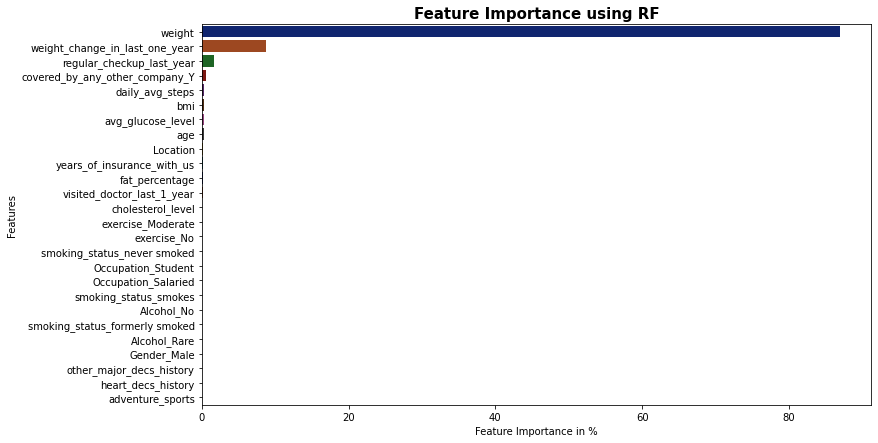

In [172]:
#4.Feature importance
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF',fontsize=15,fontweight='bold')
plt.show()

In [173]:
print(pd.DataFrame(best_grid.feature_importances_,columns=['Imp'],index=X_train.columns).sort_values('Imp',ascending=False))

                                Imp
weight                         0.87
weight_change_in_last_one_year 0.09
regular_checkup_last_year      0.02
covered_by_any_other_company_Y 0.01
daily_avg_steps                0.00
bmi                            0.00
avg_glucose_level              0.00
age                            0.00
Location                       0.00
years_of_insurance_with_us     0.00
fat_percentage                 0.00
visited_doctor_last_1_year     0.00
cholesterol_level              0.00
exercise_Moderate              0.00
exercise_No                    0.00
smoking_status_never smoked    0.00
Occupation_Student             0.00
Occupation_Salaried            0.00
smoking_status_smokes          0.00
Alcohol_No                     0.00
smoking_status_formerly smoked 0.00
Alcohol_Rare                   0.00
Gender_Male                    0.00
other_major_decs_history       0.00
heart_decs_history             0.00
adventure_sports               0.00


In [174]:
#c.Decision Tree Regressor
#1.Base Model
from sklearn.tree import DecisionTreeRegressor

In [175]:
cart=DecisionTreeRegressor(random_state=0)

In [176]:
cart.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [177]:
ytrain_predict = cart.predict(X_train)
ytest_predict = cart.predict(X_test)

In [178]:
from sklearn.metrics import r2_score

In [179]:
r2_score(y_test,ytest_predict)

0.9063753825771563

In [180]:
# R square on training data
r_sqr=cart.score(X_train, y_train)
print("R square on training data is",r_sqr)
# R square on testing data
r_sqr=cart.score(X_test, y_test)
print("R square on testing data is",r_sqr)



# adjusted R-squared on training data
adjr =1 - ( 1-cart.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y) - X_train.shape[1] - 1 )
print("Adj R-squared of the train data set is",adjr)
# adjusted R-squared
adjr =1 - ( 1-cart.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y) - X_test.shape[1] - 1 )
print("Adj R-squared of the test data set is",adjr)
# adjusted R-squared on entire data
adjr =1 - ( 1-cart.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print("Adj R-squared of the entire given dataset is",adjr)

#RMSE on Training data
predicted_train=cart.fit(X_train, y_train).predict(X_train)
rmse=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print("RMSE on training data is",rmse)
#RMSE on Testing data
predicted_test=cart.fit(X_train, y_train).predict(X_test)
rmse=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("RMSE on testing data is",rmse)



#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#MAPE on Training data
ytrain_predict = cart.predict(X_train) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the train data is ",MAPE(y_train,ytrain_predict))

#Defining MAPE function
#def MAPE(Y_actual,Y_Predicted):
 #   mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
 #   return mape

#MAPE on Testing data
ytest_predict = cart.predict(X_test) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the test data is ",MAPE(y_test,ytest_predict))


R square on training data is 1.0
R square on testing data is 0.9063753825771563
Adj R-squared of the train data set is 1.0
Adj R-squared of the test data set is 0.9718859966342087
Adj R-squared of the entire given dataset is 0.9723056603855469
RMSE on training data is 0.0
RMSE on testing data is 4349.658915424672
MAPE on the train data is  0.0
MAPE on the test data is  16.510217438182423


In [181]:
#Model score and Deduction for each Model in a DataFrame
DT1_trainscore=r2_score(y_train,ytrain_predict)
DT1_trainRMSE=np.sqrt(mean_squared_error(y_train,ytrain_predict))
DT1_trainMSE=mean_squared_error(y_train,ytrain_predict)
DT1_trainMAE=mean_absolute_error(y_train,ytrain_predict)
DT1_trainMAPE=sklearn.metrics.mean_absolute_percentage_error(y_train, ytrain_predict)

DT1_testscore=r2_score(y_test,ytest_predict)
DT1_testRMSE=np.sqrt(mean_squared_error(y_test,ytest_predict))
DT1_testMSE=mean_squared_error(y_test,ytest_predict)
DT1_testMAE=mean_absolute_error(y_test,ytest_predict)
DT1_testMAPE=sklearn.metrics.mean_absolute_percentage_error(y_test, ytest_predict)

DT1_df=pd.DataFrame({'Method':['DT1 before Grid Search'],'Test Score':DT1_testscore,'RMSE_test': DT1_testRMSE, 'MSE_test':DT1_testMSE, 'MAE_test': DT1_testMAE,'MAPE_test':DT1_testMAPE,'Train Score':DT1_trainscore,'RMSE_train': DT1_trainRMSE, 'MSE_train': DT1_trainMSE, 'MAE_train': DT1_trainMAE,'MAPE_train':DT1_trainMAPE})
metrics_df = pd.concat([metrics_df, DT1_df])
metrics_df

,Method,Test Score,RMSE_test,MSE_test,MAE_test,MAPE_test,Train Score,RMSE_train,MSE_train,MAE_train,MAPE_train
0,Linear Reg Model1,0.94,3336.76,11133980.16,2709.81,0.15,0.94,3379.43,11420544.85,2723.06,0.15
0,Linear-Reg Lasso1,0.94,3336.64,11133176.28,2709.65,0.15,0.94,3379.43,11420577.62,2723.06,0.15
0,Linear-Reg Ridge1,0.94,3336.76,11133938.92,2709.79,0.15,0.94,3379.43,11420545.03,2723.05,0.15
0,RF1 before Grid Search,0.95,3145.36,9893272.31,2517.60,0.12,0.99,1193.25,1423846.82,936.84,0.05
0,RF1 after Grid Search,0.92,4038.81,16311959.20,3186.61,0.12,0.93,3858.89,14891030.27,3043.09,0.18
0,DT1 before Grid Search,0.91,4349.66,18919532.68,3397.94,0.17,1.00,0.00,0.00,0.00,0.00


In [182]:
#2.Grid search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,6,7,8,9,10],
    'min_samples_leaf': [3,4,5,6,7],
    'min_samples_split': [115,116,117,118,119,120]
}

In [183]:
df_model = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator = df_model, param_grid = param_grid, cv = 3)

In [184]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [3, 4, 5, 6, 7],
                         'min_samples_split': [115, 116, 117, 118, 119, 120]})

In [185]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 120}

In [186]:
best_grid = grid_search.best_estimator_
best_grid

DecisionTreeRegressor(max_depth=7, min_samples_leaf=4, min_samples_split=120)

In [187]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [188]:
print("Model score on train data is",r2_score(y_train,ytrain_predict))
print("Model score on test data is",r2_score(y_test,ytest_predict))

Model score on train data is 0.9563677074990662
Model score on test data is 0.9521667328660832


In [189]:
#3.DATAFRAME CREATION
#Model score and Deduction for each Model in a DataFrame
DT1_trainscore=r2_score(y_train,ytrain_predict)
DT1_trainRMSE=np.sqrt(mean_squared_error(y_train,ytrain_predict))
DT1_trainMSE=mean_squared_error(y_train,ytrain_predict)
DT1_trainMAE=mean_absolute_error(y_train,ytrain_predict)
DT1_trainMAPE=sklearn.metrics.mean_absolute_percentage_error(y_train, ytrain_predict)

DT1_testscore=r2_score(y_test,ytest_predict)
DT1_testRMSE=np.sqrt(mean_squared_error(y_test,ytest_predict))
DT1_testMSE=mean_squared_error(y_test,ytest_predict)
DT1_testMAE=mean_absolute_error(y_test,ytest_predict)
DT1_testMAPE=sklearn.metrics.mean_absolute_percentage_error(y_test, ytest_predict)

DT1_df=pd.DataFrame({'Method':['DT1 after Grid Search'],'Test Score':DT1_testscore,'RMSE_test': DT1_testRMSE, 'MSE_test':DT1_testMSE, 'MAE_test': DT1_testMAE,'MAPE_test':DT1_testMAPE,'Train Score':DT1_trainscore,'RMSE_train': DT1_trainRMSE, 'MSE_train': DT1_trainMSE, 'MAE_train': DT1_trainMAE,'MAPE_train':DT1_trainMAPE})
metrics_df = pd.concat([metrics_df, DT1_df])

metrics_df

,Method,Test Score,RMSE_test,MSE_test,MAE_test,MAPE_test,Train Score,RMSE_train,MSE_train,MAE_train,MAPE_train
0,Linear Reg Model1,0.94,3336.76,11133980.16,2709.81,0.15,0.94,3379.43,11420544.85,2723.06,0.15
0,Linear-Reg Lasso1,0.94,3336.64,11133176.28,2709.65,0.15,0.94,3379.43,11420577.62,2723.06,0.15
0,Linear-Reg Ridge1,0.94,3336.76,11133938.92,2709.79,0.15,0.94,3379.43,11420545.03,2723.05,0.15
0,RF1 before Grid Search,0.95,3145.36,9893272.31,2517.60,0.12,0.99,1193.25,1423846.82,936.84,0.05
0,RF1 after Grid Search,0.92,4038.81,16311959.20,3186.61,0.12,0.93,3858.89,14891030.27,3043.09,0.18
0,DT1 before Grid Search,0.91,4349.66,18919532.68,3397.94,0.17,1.00,0.00,0.00,0.00,0.00
0,DT1 after Grid Search,0.95,3109.03,9666080.20,2496.25,0.12,0.96,3001.51,9009067.41,2411.85,0.12


In [190]:
#4.Feature importance
from sklearn.tree import DecisionTreeRegressor
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeRegressor()
dt_model
dt_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [191]:
dt_model.feature_importances_

array([2.98491957e-03, 2.33473416e-03, 0.00000000e+00, 1.71704238e-03,
       1.27292217e-03, 5.83842470e-03, 4.97075144e-03, 0.00000000e+00,
       0.00000000e+00, 5.60587640e-03, 5.89362227e-03, 3.18731014e-03,
       9.51645321e-01, 2.76651193e-03, 3.89791367e-03, 3.99247559e-04,
       4.53403687e-04, 6.10098288e-04, 5.00055246e-04, 5.97308230e-04,
       5.47574104e-04, 2.49504545e-03, 5.32675711e-04, 6.01771702e-04,
       6.28575806e-04, 5.18894634e-04])

In [192]:
#feature importance before grid search
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                Imp
weight                         0.95
bmi                            0.01
daily_avg_steps                0.01
avg_glucose_level              0.01
age                            0.00
fat_percentage                 0.00
Location                       0.00
years_of_insurance_with_us     0.00
weight_change_in_last_one_year 0.00
covered_by_any_other_company_Y 0.00
regular_checkup_last_year      0.00
visited_doctor_last_1_year     0.00
cholesterol_level              0.00
exercise_Moderate              0.00
Gender_Male                    0.00
Alcohol_Rare                   0.00
smoking_status_never smoked    0.00
smoking_status_smokes          0.00
Alcohol_No                     0.00
exercise_No                    0.00
smoking_status_formerly smoked 0.00
Occupation_Student             0.00
Occupation_Salaried            0.00
heart_decs_history             0.00
adventure_sports               0.00
other_major_decs_history       0.00


In [240]:
#feature importance after grid search
print(pd.DataFrame(best_grid.feature_importances_,columns=['Imp'],index=X_train.columns).sort_values('Imp',ascending=False))


                                Imp
weight                         0.99
covered_by_any_other_company_Y 0.00
regular_checkup_last_year      0.00
weight_change_in_last_one_year 0.00
years_of_insurance_with_us     0.00
avg_glucose_level              0.00
bmi                            0.00
age                            0.00
fat_percentage                 0.00
daily_avg_steps                0.00
Location                       0.00
smoking_status_never smoked    0.00
cholesterol_level              0.00
Alcohol_No                     0.00
exercise_Moderate              0.00
Alcohol_Rare                   0.00
adventure_sports               0.00
smoking_status_smokes          0.00
Occupation_Salaried            0.00
smoking_status_formerly smoked 0.00
Gender_Male                    0.00
Occupation_Student             0.00
visited_doctor_last_1_year     0.00
other_major_decs_history       0.00
heart_decs_history             0.00
exercise_No                    0.00


In [193]:
#d.MLP Regressor
#1.Base Model
from sklearn.neural_network import MLPRegressor

In [194]:
from sklearn.model_selection import GridSearchCV

In [195]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 50,activation = 'relu',
                       solver = 'adam')

In [196]:
mlp_reg.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=50)

In [197]:
#model evaluation
ytrain_pred = mlp_reg.predict(X_train)
ytest_pred = mlp_reg.predict(X_test)

In [198]:
mlp_reg.score(X_test, y_test)

0.9509187349932512

In [199]:
y_test

21492   39488.00
9488     6170.00
16933    9872.00
12604   28382.00
8222    34552.00
          ...   
13410   28382.00
13158   25914.00
3552    46892.00
23203   48126.00
2410    55530.00
Name: insurance_cost, Length: 7500, dtype: float64

In [200]:
ytest_pred

array([42088.26212888,  8734.44696338,  7881.23973192, ...,
       48395.35722117, 42915.23700207, 56751.70804951])

In [201]:
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': ytest_pred})
df_temp.head()

,Actual,Predicted
21492,39488.00,42088.26
9488,6170.00,8734.45
16933,9872.00,7881.24
12604,28382.00,23971.73
8222,34552.00,38758.35


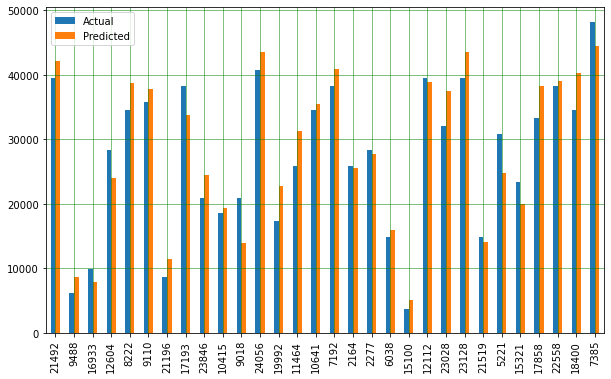

In [202]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [203]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ytest_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ytest_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ytest_pred)))

Mean Absolute Error: 2565.5694310934095
Mean Squared Error: 9918273.87772623
Root Mean Squared Error: 3149.329115498447


In [204]:
# R square on training data
r_sqr=mlp_reg.score(X_train, y_train)
print("R square on training data is",r_sqr)
# R square on testing data
r_sqr=mlp_reg.score(X_test, y_test)
print("R square on testing data is",r_sqr)



# adjusted R-squared on training data
adjr =1 - ( 1-mlp_reg.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y) - X_train.shape[1] - 1 )
print("Adj R-squared of the train data set is",adjr)
# adjusted R-squared
adjr =1 - ( 1-mlp_reg.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y) - X_test.shape[1] - 1 )
print("Adj R-squared of the test data set is",adjr)
# adjusted R-squared on entire data
adjr =1 - ( 1-mlp_reg.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print("Adj R-squared of the entire given dataset is",adjr)

#RMSE on Training data
predicted_train=mlp_reg.fit(X_train, y_train).predict(X_train)
rmse=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print("RMSE on training data is",rmse)
#RMSE on Testing data
predicted_test=mlp_reg.fit(X_train, y_train).predict(X_test)
rmse=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("RMSE on testing data is",rmse)



#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#MAPE on Training data
ytrain_predict = mlp_reg.predict(X_train) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the train data is ",MAPE(y_train,ytrain_predict))

#Defining MAPE function
#def MAPE(Y_actual,Y_Predicted):
 #   mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
 #   return mape

#MAPE on Testing data
ytest_predict = mlp_reg.predict(X_test) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the test data is ",MAPE(y_test,ytest_predict))


R square on training data is 0.9547188892145244
R square on testing data is 0.9509187349932512
Adj R-squared of the train data set is 0.9682707661220102
Adj R-squared of the test data set is 0.9852616663482318
Adj R-squared of the entire given dataset is 0.9535481870576137
RMSE on training data is 3035.143939419199
RMSE on testing data is 3133.9465320634945
MAPE on the train data is  12.422375158571603
MAPE on the test data is  13.018052162541812


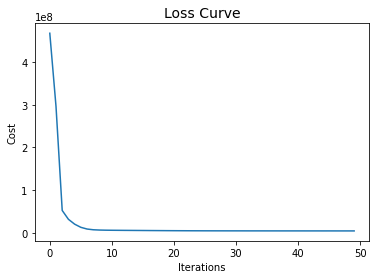

In [205]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [206]:
#Model score and Deduction for each Model in a DataFrame
MLP1_trainscore=r2_score(y_train,ytrain_predict)
MLP1_trainRMSE=np.sqrt(mean_squared_error(y_train,ytrain_predict))
MLP1_trainMSE=mean_squared_error(y_train,ytrain_predict)
MLP1_trainMAE=mean_absolute_error(y_train,ytrain_predict)
MLP1_trainMAPE=sklearn.metrics.mean_absolute_percentage_error(y_train, ytrain_predict)

MLP1_testscore=r2_score(y_test,ytest_predict)
MLP1_testRMSE=np.sqrt(mean_squared_error(y_test,ytest_predict))
MLP1_testMSE=mean_squared_error(y_test,ytest_predict)
MLP1_testMAE=mean_absolute_error(y_test,ytest_predict)
MLP1_testMAPE=sklearn.metrics.mean_absolute_percentage_error(y_test, ytest_predict)

MLP1_df=pd.DataFrame({'Method':['MLP before Grid Search'],'Test Score':MLP1_testscore,'RMSE_test': MLP1_testRMSE, 'MSE_test':MLP1_testMSE, 'MAE_test': MLP1_testMAE,'MAPE_test':MLP1_testMAPE,'Train Score':MLP1_trainscore,'RMSE_train': MLP1_trainRMSE, 'MSE_train': MLP1_trainMSE, 'MAE_train': MLP1_trainMAE,'MAPE_train':MLP1_trainMAPE})
metrics_df = pd.concat([metrics_df, MLP1_df])
metrics_df

,Method,Test Score,RMSE_test,MSE_test,MAE_test,MAPE_test,Train Score,RMSE_train,MSE_train,MAE_train,MAPE_train
0,Linear Reg Model1,0.94,3336.76,11133980.16,2709.81,0.15,0.94,3379.43,11420544.85,2723.06,0.15
0,Linear-Reg Lasso1,0.94,3336.64,11133176.28,2709.65,0.15,0.94,3379.43,11420577.62,2723.06,0.15
0,Linear-Reg Ridge1,0.94,3336.76,11133938.92,2709.79,0.15,0.94,3379.43,11420545.03,2723.05,0.15
0,RF1 before Grid Search,0.95,3145.36,9893272.31,2517.60,0.12,0.99,1193.25,1423846.82,936.84,0.05
0,RF1 after Grid Search,0.92,4038.81,16311959.20,3186.61,0.12,0.93,3858.89,14891030.27,3043.09,0.18
0,DT1 before Grid Search,0.91,4349.66,18919532.68,3397.94,0.17,1.00,0.00,0.00,0.00,0.00
0,DT1 after Grid Search,0.95,3109.03,9666080.20,2496.25,0.12,0.96,3001.51,9009067.41,2411.85,0.12
0,MLP before Grid Search,0.95,3133.95,9821620.87,2551.47,0.13,0.96,3029.55,9178177.84,2457.26,0.12


In [207]:
#2.Grid search CV
#hyper parameter tuning
param_grid = {
    'hidden_layer_sizes': [50, 100],
    'activation': ['logistic', 'relu'],
    'learning_rate': [ 'adaptive'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1],
    'max_iter' : [100]
    
}

In [208]:
c=pd.concat([X_train, y_train],axis =1)

In [209]:
c.isnull().sum()

years_of_insurance_with_us        0
regular_checkup_last_year         0
adventure_sports                  0
visited_doctor_last_1_year        0
cholesterol_level                 0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
avg_glucose_level                 0
bmi                               0
Location                          0
weight                            0
weight_change_in_last_one_year    0
fat_percentage                    0
Occupation_Salaried               0
Occupation_Student                0
Gender_Male                       0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
covered_by_any_other_company_Y    0
Alcohol_No                        0
Alcohol_Rare                      0
exercise_Moderate                 0
exercise_No                       0
insurance_cost                    0
dtype: int64

In [210]:
 c.isnull().values.any()

False

In [211]:
c.dtypes

years_of_insurance_with_us        float64
regular_checkup_last_year         float64
adventure_sports                  float64
visited_doctor_last_1_year        float64
cholesterol_level                 float64
daily_avg_steps                   float64
age                               float64
heart_decs_history                float64
other_major_decs_history          float64
avg_glucose_level                 float64
bmi                               float64
Location                          float64
weight                            float64
weight_change_in_last_one_year    float64
fat_percentage                    float64
Occupation_Salaried               float64
Occupation_Student                float64
Gender_Male                       float64
smoking_status_formerly smoked    float64
smoking_status_never smoked       float64
smoking_status_smokes             float64
covered_by_any_other_company_Y    float64
Alcohol_No                        float64
Alcohol_Rare                      

In [212]:
grid = GridSearchCV(mlp_reg, param_grid, cv=3)
grid.fit(X_train, y_train)

print(grid.best_params_) 

{'activation': 'logistic', 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'sgd', 'tol': 0.1}


In [213]:
grid_predictions = grid.predict(X_test)

In [214]:
df_temp2 = pd.DataFrame({'Actual': y_test, 'Predicted': grid_predictions})
df_temp2.head()

,Actual,Predicted
21492,39488.00,44377.21
9488,6170.00,12879.89
16933,9872.00,7753.98
12604,28382.00,26950.75
8222,34552.00,40959.95


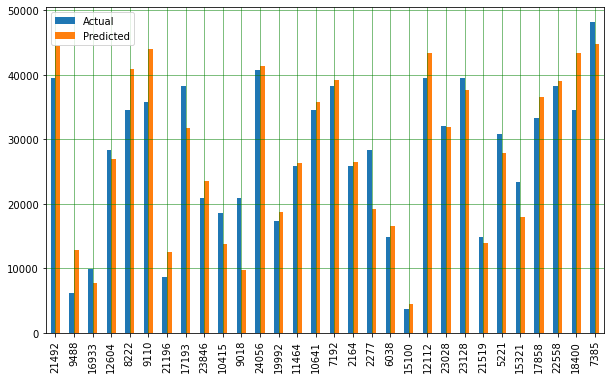

In [215]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [216]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, grid_predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, grid_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))

Mean Absolute Error: 3632.965102374654
Mean Squared Error: 21100739.91989383
Root Mean Squared Error: 4593.55417078038


In [217]:
#3.DATAFRAME CREATION
#Model score and Deduction for each Model in a DataFrame
MLP1_trainscore=r2_score(y_train,ytrain_pred)
MLP1_trainRMSE=np.sqrt(mean_squared_error(y_train,ytrain_pred))
MLP1_trainMSE=mean_squared_error(y_train,ytrain_pred)
MLP1_trainMAE=mean_absolute_error(y_train,ytrain_pred)

MLP1_testscore=r2_score(y_test,ytest_pred)
MLP1_testRMSE=np.sqrt(mean_squared_error(y_test,ytest_pred))
MLP1_testMSE=mean_squared_error(y_test,ytest_pred)
MLP1_testMAE=mean_absolute_error(y_test,ytest_pred)

MLP1_df=pd.DataFrame({'Method':['MLP1'],'Test Score':MLP1_testscore,'RMSE_test': MLP1_testRMSE, 'MSE_test': MLP1_testMSE, 'MAE_test': MLP1_testMAE,'Train Score':MLP1_trainscore,'RMSE_train': MLP1_trainRMSE, 'MSE_train': MLP1_trainMSE, 'MAE_train': MLP1_trainMAE})
metrics_df = pd.concat([metrics_df, MLP1_df])

metrics_df


,Method,Test Score,RMSE_test,MSE_test,MAE_test,MAPE_test,Train Score,RMSE_train,MSE_train,MAE_train,MAPE_train
0,Linear Reg Model1,0.94,3336.76,11133980.16,2709.81,0.15,0.94,3379.43,11420544.85,2723.06,0.15
0,Linear-Reg Lasso1,0.94,3336.64,11133176.28,2709.65,0.15,0.94,3379.43,11420577.62,2723.06,0.15
0,Linear-Reg Ridge1,0.94,3336.76,11133938.92,2709.79,0.15,0.94,3379.43,11420545.03,2723.05,0.15
0,RF1 before Grid Search,0.95,3145.36,9893272.31,2517.60,0.12,0.99,1193.25,1423846.82,936.84,0.05
0,RF1 after Grid Search,0.92,4038.81,16311959.20,3186.61,0.12,0.93,3858.89,14891030.27,3043.09,0.18
0,DT1 before Grid Search,0.91,4349.66,18919532.68,3397.94,0.17,1.00,0.00,0.00,0.00,0.00
0,DT1 after Grid Search,0.95,3109.03,9666080.20,2496.25,0.12,0.96,3001.51,9009067.41,2411.85,0.12
0,MLP before Grid Search,0.95,3133.95,9821620.87,2551.47,0.13,0.96,3029.55,9178177.84,2457.26,0.12
0,MLP1,0.95,3149.33,9918273.88,2565.57,NaN,0.95,3057.70,9349510.55,2483.12,NaN


In [218]:
#4.Feature importance
from sklearn.tree import DecisionTreeRegressor
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeRegressor()
dt_model
dt_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [219]:
#e.Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
GB1=GradientBoostingRegressor(n_estimators = 50, learning_rate = 0.1, random_state=0)
GB1.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=50, random_state=0)

In [220]:
ytrain_pred= GB1.predict(X_train)
ytest_pred= GB1.predict(X_test)

In [221]:
# R square on training data
r_sqr=GB1.score(X_train, y_train)
print("R square on training data is",r_sqr)
# R square on testing data
r_sqr=GB1.score(X_test, y_test)
print("R square on testing data is",r_sqr)



# adjusted R-squared on training data
adjr =1 - ( 1-GB1.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y) - X_train.shape[1] - 1 )
print("Adj R-squared of the train data set is",adjr)
# adjusted R-squared
adjr =1 - ( 1-GB1.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y) - X_test.shape[1] - 1 )
print("Adj R-squared of the test data set is",adjr)
# adjusted R-squared on entire data
adjr =1 - ( 1-GB1.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print("Adj R-squared of the entire given dataset is",adjr)

#RMSE on Training data
predicted_train=GB1.fit(X_train, y_train).predict(X_train)
rmse=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print("RMSE on training data is",rmse)
#RMSE on Testing data
predicted_test=GB1.fit(X_train, y_train).predict(X_test)
rmse=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("RMSE on testing data is",rmse)



#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#MAPE on Training data
ytrain_predict = GB1.predict(X_train) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the train data is ",MAPE(y_train,ytrain_predict))

#Defining MAPE function
#def MAPE(Y_actual,Y_Predicted):
 #   mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
 #   return mape

#MAPE on Testing data
ytest_predict = GB1.predict(X_test) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the test data is ",MAPE(y_test,ytest_predict))


R square on training data is 0.9557170884442033
R square on testing data is 0.9542674726439833
Adj R-squared of the train data set is 0.968970221066156
Adj R-squared of the test data set is 0.9862672397131794
Adj R-squared of the entire given dataset is 0.9552427074945834
RMSE on training data is 3023.8064279359137
RMSE on testing data is 3039.9943459427445
MAPE on the train data is  12.383096149236016
MAPE on the test data is  12.455828883357087


In [222]:
#Model score and Deduction for each Model in a DataFrame
GB1_trainscore=r2_score(y_train,ytrain_pred)
GB1_trainRMSE=np.sqrt(mean_squared_error(y_train,ytrain_pred))
GB1_trainMSE=mean_squared_error(y_train,ytrain_pred)
GB1_trainMAE=mean_absolute_error(y_train,ytrain_pred)
GB1_trainMAPE=sklearn.metrics.mean_absolute_percentage_error(y_train, ytrain_predict)

GB1_testscore=r2_score(y_test,ytest_pred)
GB1_testRMSE=np.sqrt(mean_squared_error(y_test,ytest_pred))
GB1_testMSE=mean_squared_error(y_test,ytest_pred)
GB1_testMAE=mean_absolute_error(y_test,ytest_pred)
GB1_testMAPE=sklearn.metrics.mean_absolute_percentage_error(y_test, ytest_predict)

GB1_df=pd.DataFrame({'Method':['Gradient Boosting'],'Test Score':GB1_testscore,'RMSE_test': GB1_testRMSE, 'MSE_test': GB1_testMSE, 'MAE_test': GB1_testMAE,'MAPE_test':GB1_testMAPE,'Train Score':GB1_trainscore,'RMSE_train': GB1_trainRMSE, 'MSE_train': GB1_trainMSE, 'MAE_train': GB1_trainMAE,'MAPE_train':GB1_trainMAPE})
metrics_df = pd.concat([metrics_df, GB1_df])

metrics_df

,Method,Test Score,RMSE_test,MSE_test,MAE_test,MAPE_test,Train Score,RMSE_train,MSE_train,MAE_train,MAPE_train
0,Linear Reg Model1,0.94,3336.76,11133980.16,2709.81,0.15,0.94,3379.43,11420544.85,2723.06,0.15
0,Linear-Reg Lasso1,0.94,3336.64,11133176.28,2709.65,0.15,0.94,3379.43,11420577.62,2723.06,0.15
0,Linear-Reg Ridge1,0.94,3336.76,11133938.92,2709.79,0.15,0.94,3379.43,11420545.03,2723.05,0.15
0,RF1 before Grid Search,0.95,3145.36,9893272.31,2517.60,0.12,0.99,1193.25,1423846.82,936.84,0.05
0,RF1 after Grid Search,0.92,4038.81,16311959.20,3186.61,0.12,0.93,3858.89,14891030.27,3043.09,0.18
0,DT1 before Grid Search,0.91,4349.66,18919532.68,3397.94,0.17,1.00,0.00,0.00,0.00,0.00
0,DT1 after Grid Search,0.95,3109.03,9666080.20,2496.25,0.12,0.96,3001.51,9009067.41,2411.85,0.12
0,MLP before Grid Search,0.95,3133.95,9821620.87,2551.47,0.13,0.96,3029.55,9178177.84,2457.26,0.12
0,MLP1,0.95,3149.33,9918273.88,2565.57,NaN,0.95,3057.70,9349510.55,2483.12,NaN
0,Gradient Boosting,0.95,3039.99,9241565.62,2461.31,0.12,0.96,3023.81,9143405.31,2442.16,0.12


In [223]:
#f.Ada Boosting
from sklearn.ensemble import AdaBoostRegressor

In [224]:
ADB = AdaBoostRegressor(n_estimators = 50, learning_rate = 0.1, random_state=0)
ADB.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.1, random_state=0)

In [225]:
ytrain_pred= ADB.predict(X_train)
ytest_pred= ADB.predict(X_test)


In [226]:
# R square on training data
r_sqr=ADB.score(X_train, y_train)
print("R square on training data is",r_sqr)
# R square on testing data
r_sqr=ADB.score(X_test, y_test)
print("R square on testing data is",r_sqr)



# adjusted R-squared on training data
adjr =1 - ( 1-ADB.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y) - X_train.shape[1] - 1 )
print("Adj R-squared of the train data set is",adjr)
# adjusted R-squared
adjr =1 - ( 1-ADB.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y) - X_test.shape[1] - 1 )
print("Adj R-squared of the test data set is",adjr)
# adjusted R-squared on entire data
adjr =1 - ( 1-ADB.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print("Adj R-squared of the entire given dataset is",adjr)

#RMSE on Training data
predicted_train=ADB.fit(X_train, y_train).predict(X_train)
rmse=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print("RMSE on training data is",rmse)
#RMSE on Testing data
predicted_test=ADB.fit(X_train, y_train).predict(X_test)
rmse=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("RMSE on testing data is",rmse)



#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#MAPE on Training data
ytrain_predict = ADB.predict(X_train) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the train data is ",MAPE(y_train,ytrain_predict))

#Defining MAPE function
#def MAPE(Y_actual,Y_Predicted):
 #   mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
 #   return mape

#MAPE on Testing data
ytest_predict = ADB.predict(X_test) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the test data is ",MAPE(y_test,ytest_predict))


R square on training data is 0.9490827148988714
R square on testing data is 0.9479245322924726
Adj R-squared of the train data set is 0.9643214042371901
Adj R-squared of the test data set is 0.9843625542650564
Adj R-squared of the entire given dataset is 0.9486877114645861
RMSE on training data is 3242.414416345254
RMSE on testing data is 3243.9695130678247
MAPE on the train data is  14.082242288034294
MAPE on the test data is  14.118109854005395


In [227]:
#Model score and Deduction for each Model in a DataFrame
ADB_trainscore=r2_score(y_train,ytrain_pred)
ADB_trainRMSE=np.sqrt(mean_squared_error(y_train,ytrain_pred))
ADB_trainMSE=mean_squared_error(y_train,ytrain_pred)
ADB_trainMAE=mean_absolute_error(y_train,ytrain_pred)
ADB_trainMAPE=sklearn.metrics.mean_absolute_percentage_error(y_train, ytrain_predict)

ADB_testscore=r2_score(y_test,ytest_pred)
ADB_testRMSE=np.sqrt(mean_squared_error(y_test,ytest_pred))
ADB_testMSE=mean_squared_error(y_test,ytest_pred)
ADB_testMAE=mean_absolute_error(y_test,ytest_pred)
ADB_testMAPE=sklearn.metrics.mean_absolute_percentage_error(y_test, ytest_predict)

ADB_df=pd.DataFrame({'Method':['ADA Boosting'],'Test Score':ADB_testscore,'RMSE_test': ADB_testRMSE, 'MSE_test': ADB_testMSE, 'MAE_test': ADB_testMAE,'MAPE_test':ADB_testMAPE,'Train Score':ADB_trainscore,'RMSE_train': ADB_trainRMSE, 'MSE_train': ADB_trainMSE, 'MAE_train': ADB_trainMAE,'MAPE_train':ADB_trainMAPE})
metrics_df = pd.concat([metrics_df, ADB_df])

metrics_df

,Method,Test Score,RMSE_test,MSE_test,MAE_test,MAPE_test,Train Score,RMSE_train,MSE_train,MAE_train,MAPE_train
0,Linear Reg Model1,0.94,3336.76,11133980.16,2709.81,0.15,0.94,3379.43,11420544.85,2723.06,0.15
0,Linear-Reg Lasso1,0.94,3336.64,11133176.28,2709.65,0.15,0.94,3379.43,11420577.62,2723.06,0.15
0,Linear-Reg Ridge1,0.94,3336.76,11133938.92,2709.79,0.15,0.94,3379.43,11420545.03,2723.05,0.15
0,RF1 before Grid Search,0.95,3145.36,9893272.31,2517.60,0.12,0.99,1193.25,1423846.82,936.84,0.05
0,RF1 after Grid Search,0.92,4038.81,16311959.20,3186.61,0.12,0.93,3858.89,14891030.27,3043.09,0.18
0,DT1 before Grid Search,0.91,4349.66,18919532.68,3397.94,0.17,1.00,0.00,0.00,0.00,0.00
0,DT1 after Grid Search,0.95,3109.03,9666080.20,2496.25,0.12,0.96,3001.51,9009067.41,2411.85,0.12
0,MLP before Grid Search,0.95,3133.95,9821620.87,2551.47,0.13,0.96,3029.55,9178177.84,2457.26,0.12
0,MLP1,0.95,3149.33,9918273.88,2565.57,NaN,0.95,3057.70,9349510.55,2483.12,NaN
0,Gradient Boosting,0.95,3039.99,9241565.62,2461.31,0.12,0.96,3023.81,9143405.31,2442.16,0.12


In [228]:
#b. Test your predictive model against the test set using various appropriate performance metrics
#c.Interpretation of the model(s)
#2). Model Tuning and business implication
#a. Ensemble modelling (if necessary)
#1.BAGGING on CART

In [229]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
cart1 = DecisionTreeRegressor()
Bagging_model1=BaggingRegressor(base_estimator=cart,n_estimators=10,random_state=1)
Bagging_model1.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=0),
                 random_state=1)

In [230]:
## Performance Matrix on train data set
ytrain_predict = Bagging_model1.predict(X_train)
model_score =Bagging_model1.score(X_train, y_train)
print(model_score)

0.9910581460448872


In [231]:
## Performance Matrix on test data set
ytest_predict = Bagging_model1.predict(X_test)
model_score = Bagging_model1.score(X_test, y_test)
print(model_score)

0.9475806332774053


In [232]:
# R square on training data
r_sqr=Bagging_model1.score(X_train, y_train)
print("R square on training data is",r_sqr)
# R square on testing data
r_sqr=Bagging_model1.score(X_test, y_test)
print("R square on testing data is",r_sqr)



# adjusted R-squared on training data
adjr =1 - ( 1-Bagging_model1.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y) - X_train.shape[1] - 1 )
print("Adj R-squared of the train data set is",adjr)
# adjusted R-squared
adjr =1 - ( 1-Bagging_model1.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y) - X_test.shape[1] - 1 )
print("Adj R-squared of the test data set is",adjr)
# adjusted R-squared on entire data
adjr =1 - ( 1-Bagging_model1.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print("Adj R-squared of the entire given dataset is",adjr)

#RMSE on Training data
predicted_train=Bagging_model1.fit(X_train, y_train).predict(X_train)
rmse=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print("RMSE on training data is",rmse)
#RMSE on Testing data
predicted_test=Bagging_model1.fit(X_train, y_train).predict(X_test)
rmse=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("RMSE on testing data is",rmse)



#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#MAPE on Training data
ytrain_predict = Bagging_model1.predict(X_train) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the train data is ",MAPE(y_train,ytrain_predict))

#Defining MAPE function
#def MAPE(Y_actual,Y_Predicted):
 #   mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
 #   return mape

#MAPE on Testing data
ytest_predict = Bagging_model1.predict(X_test) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the test data is ",MAPE(y_test,ytest_predict))


R square on training data is 0.9910581460448872
R square on testing data is 0.9475806332774053
Adj R-squared of the train data set is 0.9937342929419566
Adj R-squared of the test data set is 0.9842592867876211
Adj R-squared of the entire given dataset is 0.978188211068677
RMSE on training data is 1358.7816973047163
RMSE on testing data is 3254.663244812895
MAPE on the train data is  4.980903375230695
MAPE on the test data is  12.777263969885569


In [233]:
#Model score and Deduction for each Model in a DataFrame
BG1_trainscore=r2_score(y_train,ytrain_predict)
BG1_trainRMSE=np.sqrt(mean_squared_error(y_train,ytrain_predict))
BG1_trainMSE=mean_squared_error(y_train,ytrain_predict)
BG1_trainMAE=mean_absolute_error(y_train,ytrain_predict)
BG1_trainMAPE=sklearn.metrics.mean_absolute_percentage_error(y_train, ytrain_predict)

BG1_testscore=r2_score(y_test,ytest_predict)
BG1_testRMSE=np.sqrt(mean_squared_error(y_test,ytest_predict))
BG1_testMSE=mean_squared_error(y_test,ytest_predict)
BG1_testMAE=mean_absolute_error(y_test,ytest_predict)
BG1_testMAPE=sklearn.metrics.mean_absolute_percentage_error(y_test, ytest_predict)

BG1_df=pd.DataFrame({'Method':['Bagging on DT'],'Test Score':BG1_testscore,'RMSE_test': BG1_testRMSE, 'MSE_test':BG1_testMSE, 'MAE_test': BG1_testMAE,'MAPE_test':BG1_testMAPE,'Train Score':BG1_trainscore,'RMSE_train': BG1_trainRMSE, 'MSE_train': BG1_trainMSE, 'MAE_train': BG1_trainMAE,'MAPE_train':BG1_trainMAPE})
metrics_df = pd.concat([metrics_df, BG1_df])

metrics_df


,Method,Test Score,RMSE_test,MSE_test,MAE_test,MAPE_test,Train Score,RMSE_train,MSE_train,MAE_train,MAPE_train
0,Linear Reg Model1,0.94,3336.76,11133980.16,2709.81,0.15,0.94,3379.43,11420544.85,2723.06,0.15
0,Linear-Reg Lasso1,0.94,3336.64,11133176.28,2709.65,0.15,0.94,3379.43,11420577.62,2723.06,0.15
0,Linear-Reg Ridge1,0.94,3336.76,11133938.92,2709.79,0.15,0.94,3379.43,11420545.03,2723.05,0.15
0,RF1 before Grid Search,0.95,3145.36,9893272.31,2517.60,0.12,0.99,1193.25,1423846.82,936.84,0.05
0,RF1 after Grid Search,0.92,4038.81,16311959.20,3186.61,0.12,0.93,3858.89,14891030.27,3043.09,0.18
0,DT1 before Grid Search,0.91,4349.66,18919532.68,3397.94,0.17,1.00,0.00,0.00,0.00,0.00
0,DT1 after Grid Search,0.95,3109.03,9666080.20,2496.25,0.12,0.96,3001.51,9009067.41,2411.85,0.12
0,MLP before Grid Search,0.95,3133.95,9821620.87,2551.47,0.13,0.96,3029.55,9178177.84,2457.26,0.12
0,MLP1,0.95,3149.33,9918273.88,2565.57,NaN,0.95,3057.70,9349510.55,2483.12,NaN
0,Gradient Boosting,0.95,3039.99,9241565.62,2461.31,0.12,0.96,3023.81,9143405.31,2442.16,0.12


In [234]:
#BAGGING ON RANDOM FOREST
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
RF1 = RandomForestRegressor()
Bagging_model2=BaggingRegressor(base_estimator=RF1,n_estimators=10,random_state=1)
Bagging_model2.fit(X_train, y_train)

BaggingRegressor(base_estimator=RandomForestRegressor(), random_state=1)

In [235]:
## Performance Matrix on train data set
ytrain_predict = Bagging_model2.predict(X_train)
model_score =Bagging_model2.score(X_train, y_train)
print(model_score)

0.9831148979655132


In [236]:
## Performance Matrix on test data set
ytest_predict = Bagging_model2.predict(X_test)
model_score = Bagging_model2.score(X_test, y_test)
print(model_score)

0.9530416362463913


In [237]:
# R square on training data
r_sqr=Bagging_model2.score(X_train, y_train)
print("R square on training data is",r_sqr)
# R square on testing data
r_sqr=Bagging_model2.score(X_test, y_test)
print("R square on testing data is",r_sqr)



# adjusted R-squared on training data
adjr =1 - ( 1-Bagging_model2.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y) - X_train.shape[1] - 1 )
print("Adj R-squared of the train data set is",adjr)
# adjusted R-squared
adjr =1 - ( 1-Bagging_model2.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y) - X_test.shape[1] - 1 )
print("Adj R-squared of the test data set is",adjr)
# adjusted R-squared on entire data
adjr =1 - ( 1-Bagging_model2.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
print("Adj R-squared of the entire given dataset is",adjr)

#RMSE on Training data
predicted_train=Bagging_model2.fit(X_train, y_train).predict(X_train)
rmse=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
print("RMSE on training data is",rmse)
#RMSE on Testing data
predicted_test=Bagging_model2.fit(X_train, y_train).predict(X_test)
rmse=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("RMSE on testing data is",rmse)



#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#MAPE on Training data
ytrain_predict = Bagging_model2.predict(X_train) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the train data is ",MAPE(y_train,ytrain_predict))

#Defining MAPE function
#def MAPE(Y_actual,Y_Predicted):
 #   mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
 #   return mape

#MAPE on Testing data
ytest_predict = Bagging_model2.predict(X_test) 

#LR_MAPE= MAPE(Y_test,LR_Test_predict)
#print("MAPE: ",LR_MAPE)

print("MAPE on the test data is ",MAPE(y_test,ytest_predict))


R square on training data is 0.9831148979655132
R square on testing data is 0.9530416362463913
Adj R-squared of the train data set is 0.9881683257717742
Adj R-squared of the test data set is 0.9858991402799699
Adj R-squared of the entire given dataset is 0.9742017896583267
RMSE on training data is 1867.1867068340277
RMSE on testing data is 3080.467649623675
MAPE on the train data is  7.344121992663885
MAPE on the test data is  12.244645770664475


In [239]:
#Model score and Deduction for each Model in a DataFrame
BG1_trainscore=r2_score(y_train,ytrain_predict)
BG1_trainRMSE=np.sqrt(mean_squared_error(y_train,ytrain_predict))
BG1_trainMSE=mean_squared_error(y_train,ytrain_predict)
BG1_trainMAE=mean_absolute_error(y_train,ytrain_predict)
BG1_trainMAPE=sklearn.metrics.mean_absolute_percentage_error(y_train, ytrain_predict)

BG1_testscore=r2_score(y_test,ytest_predict)
BG1_testRMSE=np.sqrt(mean_squared_error(y_test,ytest_predict))
BG1_testMSE=mean_squared_error(y_test,ytest_predict)
BG1_testMAE=mean_absolute_error(y_test,ytest_predict)
BG1_testnMAPE=sklearn.metrics.mean_absolute_percentage_error(y_test, ytest_predict)

BG1_df=pd.DataFrame({'Method':['Bagging on RF'],'Test Score':BG1_testscore,'RMSE_test': BG1_testRMSE, 'MSE_test':BG1_testMSE, 'MAE_test': BG1_testMAE,'MAPE_test':BG1_testMAPE,'Train Score':BG1_trainscore,'RMSE_train': BG1_trainRMSE, 'MSE_train': BG1_trainMSE, 'MAE_train': BG1_trainMAE,'MAPE_train':BG1_trainMAPE})
metrics_df = pd.concat([metrics_df, BG1_df])

metrics_df

,Method,Test Score,RMSE_test,MSE_test,MAE_test,MAPE_test,Train Score,RMSE_train,MSE_train,MAE_train,MAPE_train
0,Linear Reg Model1,0.94,3336.76,11133980.16,2709.81,0.15,0.94,3379.43,11420544.85,2723.06,0.15
0,Linear-Reg Lasso1,0.94,3336.64,11133176.28,2709.65,0.15,0.94,3379.43,11420577.62,2723.06,0.15
0,Linear-Reg Ridge1,0.94,3336.76,11133938.92,2709.79,0.15,0.94,3379.43,11420545.03,2723.05,0.15
0,RF1 before Grid Search,0.95,3145.36,9893272.31,2517.60,0.12,0.99,1193.25,1423846.82,936.84,0.05
0,RF1 after Grid Search,0.92,4038.81,16311959.20,3186.61,0.12,0.93,3858.89,14891030.27,3043.09,0.18
0,DT1 before Grid Search,0.91,4349.66,18919532.68,3397.94,0.17,1.00,0.00,0.00,0.00,0.00
0,DT1 after Grid Search,0.95,3109.03,9666080.20,2496.25,0.12,0.96,3001.51,9009067.41,2411.85,0.12
0,MLP before Grid Search,0.95,3133.95,9821620.87,2551.47,0.13,0.96,3029.55,9178177.84,2457.26,0.12
0,MLP1,0.95,3149.33,9918273.88,2565.57,NaN,0.95,3057.70,9349510.55,2483.12,NaN
0,Gradient Boosting,0.95,3039.99,9241565.62,2461.31,0.12,0.96,3023.81,9143405.31,2442.16,0.12
